# **Table of Contents**

1.   Table of contents

2.   Bibliography

3.   Contexte

4.   Librairies and dataframe's Import

5.   AHC Dendogram

6.   K-means

7.   Conclusions





# **Bibliography**

. Consignes : https://openclassrooms.com/fr/paths/324/projects/862/assignment

. Données : https://www.fao.org/faostat/fr/#data/

. Transfer Learning : https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/


. Clustering : https://www.explorium.ai/blog/machine-learning/clustering-when-you-should-use-it-and-avoid-it/#:~:text=Clustering%20is%20an%20unsupervised%20machine,more%20easily%20understood%20and%20manipulated.

. CAH : https://www.xlstat.com/fr/solutions/fonctionnalites/classification-ascendante-hierarchique-cah#:~:text=classification%20ascendante%20hi%C3%A9rarchique-,La%20classification%20ascendante%20hi%C3%A9rarchique%20(CAH)%20est%20une%20m%C3%A9thode%20de%20classification,%C3%A0%20la%20nature%20des%20donn%C3%A9es.

. K-means : https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/#:~:text=K%2Dmeans%20is%20a%20centroid,is%20associated%20with%20a%20centroid.

# **Contexte**

La poule qui chante, a French food company that wants to expand internationally.

International, yes, but for the moment, the field of possibilities is very wide: no particular country or continent has been chosen for the moment. All countries are possible!

Currently, our objective is to offer an initial analysis of the groupings of countries that we can target to export our chickens. We will then delve deeper into the market research.

Patrick, the manager, asks us, as data analyst at "the singing hen", to first test the hierarchical ascending classification, with a dendrogram as visualization. Then use the k-means method, in order to refine the analysis and compare the results of the two clustering methods.


It also indicates not to hesitate to take the time to analyze the centroids of the classes found. We can also carry out a PCA in order to visualize the results of your analysis, understand the groups, the links between the variables, the links between individuals...

This is the second notebook of this project, in which we carried out the clustering of countries.

# **Librairies and dataframe's Import**

In [ ]:
# Common libraries for ML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import seaborn as sns
import missingno as msno
import os
from os import listdir
import time
from pylab import figure, text, scatter, show
import re
import warnings
warnings.filterwarnings('ignore')
import time


# Regressors
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans, vq
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import linkage, fcluster

# Pipeline
from sklearn.pipeline import Pipeline

# Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Size reduction
from sklearn.manifold import TSNE
from sklearn import decomposition
from sklearn.decomposition import PCA

# Metrics
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn import cluster, metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance


# Statistics
import scipy.stats
from scipy import stats
from scipy.stats import shapiro, kstest, anderson
import statsmodels.api as sm
from scipy.stats import f_oneway
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import chi2_contingency

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(
'/content/drive/MyDrive/projet 9 data analyse/mon_fichier.csv',
low_memory=False)

df.head()

,Zone,Alimentation pour touristes,Disponibilité de protéines en quantité (g/personne/jour),Importations - Quantité,Nourriture,Variation de stock,Population,Stabilité,PIB par habitant,distance_to_france
0,Afghanistan,242.776667,0.54,29000.0,55000.0,0.0,36296113.0,-2.80,530.149831,5480.783491
1,South Africa,0.000000,14.11,514000.0,2035000.0,0.0,57009756.0,-0.28,6723.928582,8692.457950
2,Albania,242.776667,6.26,38000.0,47000.0,4000.0,2884169.0,0.38,4521.752217,1576.486793
3,Algeria,0.000000,1.97,2000.0,264000.0,0.0,41389189.0,-0.92,4134.936055,2049.304179
4,Germany,242.776667,7.96,842000.0,1609000.0,-29000.0,82658409.0,0.59,44670.222282,798.644139


**Data standardization**

The data must be standardized so as not to affect the clustering algorithms.

In [ ]:
# Data preparation by removing the 'Zone' column which is not numeric
features = df.drop('Zone', axis=1)

# Data normalization
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
# Checking the values ​​if they are well centered (-1.1)
idx = ["mean", "std"]
pd.DataFrame(features_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8
mean,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# **AHC Dendogram**

CAH, or Hierarchical Ascending Classification, is a data analysis method used in statistics and machine learning to group data based on their similarity.


CAH is a clustering method that builds a hierarchy of groups by proceeding in an agglomerative (bottom-up) manner. The process begins with each data point in its own cluster and merges successive clusters until only one remains.

Hierarchical Ascending Classification (CAH) is an iterative classification method whose principle is simple.

We start by calculating the dissimilarity between the N objects.
Then we group the two objects whose grouping minimizes a given aggregation criterion, thus creating a class including these two objects.
We then calculate the dissimilarity between this class and the N-2 other objects using the aggregation criterion. Then we group the two objects or classes of objects whose grouping minimizes the aggregation criterion.

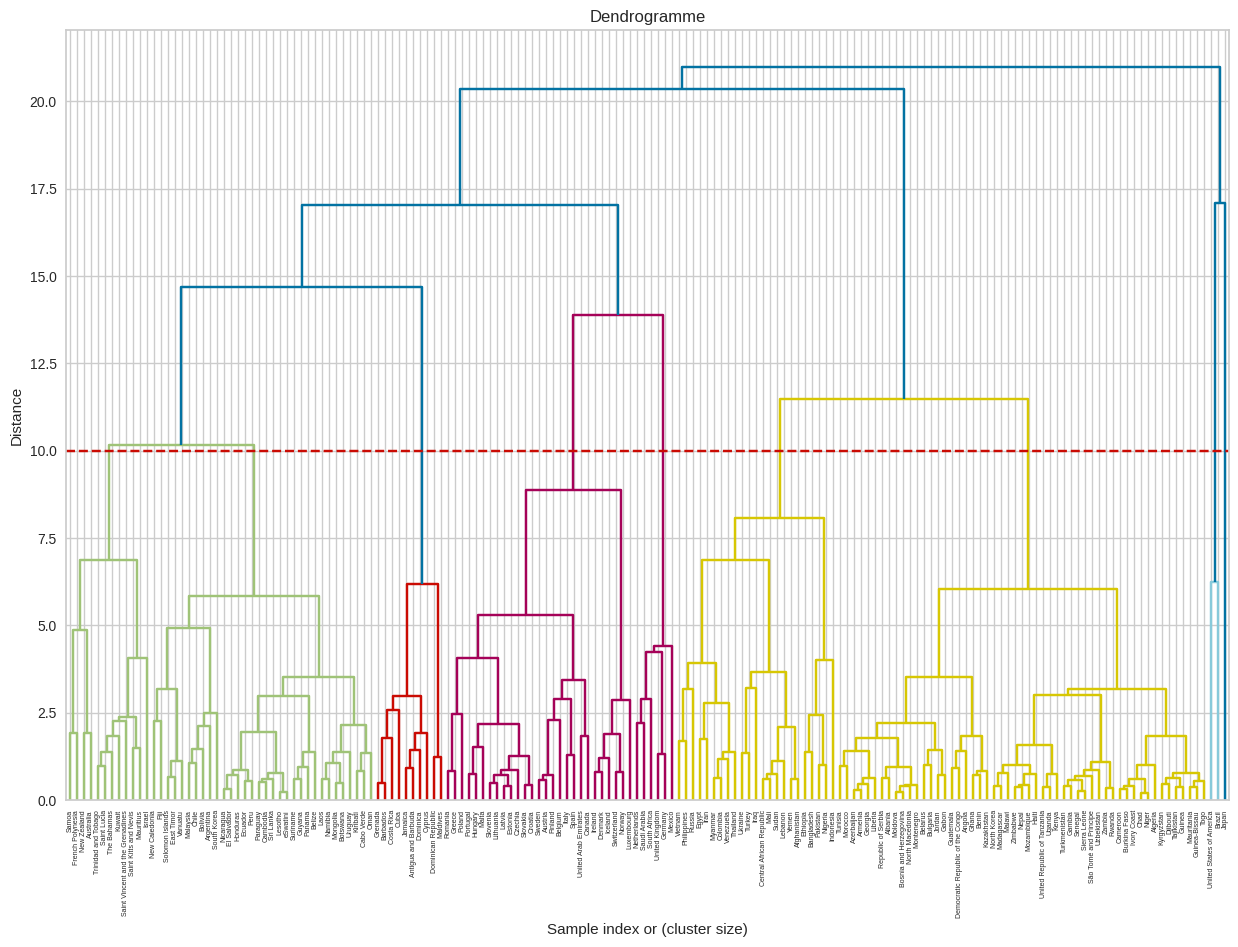

Cluster_AHC 1:
Brazil, United States of America


Cluster_AHC 2:
Japan


Cluster_AHC 3:
Albania, Algeria, Angola, Armenia, Azerbaijan, Bosnia and Herzegovina, Bulgaria, Burkina Faso, Belarus, Benin, Cameroon, Democratic Republic of the Congo, Ivory Coast, Djibouti, Gabon, Gambia, Ghana, Guatemala, Guinea, Guinea-Bissau, Georgia, Haiti, Jordan, Kazakhstan, Kenya, Kyrgyzstan, Liberia, North Macedonia, Madagascar, Malawi, Morocco, Mauritania, Montenegro, Mozambique, Niger, Nepal, Uganda, Uzbekistan, Rwanda, Moldova, North Korea, United Republic of Tanzania, São Tomé and Principe, Republic of Serbia, Sierra Leone, Senegal, Tajikistan, Chad, Togo, Tunisia, Turkmenistan, Zambia, Zimbabwe


Cluster_AHC 4:
Afghanistan, Bangladesh, Colombia, Russia, Indonesia, Iran, Iraq, Lebanon, Mali, Myanmar, Nigeria, Pakistan, Philippines, Central African Republic, Sudan, Thailand, Turkey, Ukraine, Venezuela, Vietnam, Yemen, Egypt, Ethiopia


Cluster_AHC 5:
South Africa, Germany, Saudi Arabia, Mexico, Nethe

In [ ]:
def plot_dendrogram_and_get_clusters(df, distance_threshold=10):

    # Calculation of hierarchical links
    linked = linkage(features_scaled, method='ward')

    # Draw the dendrogram
    plt.figure(figsize=(15, 10))
    dendrogram(linked,
               orientation='top',
               labels=df['Zone'].values,
               distance_sort='descending',
               show_leaf_counts=True)
    plt.title('Dendrogramme')
    plt.xlabel('Sample index or (cluster size)')
    plt.ylabel('Distance')
    plt.axhline(y=distance_threshold, color='r', linestyle='--')
    plt.show()

    # Determine clusters
    clusters = fcluster(linked, t=distance_threshold, criterion='distance')

    # Add cluster labels to the dataframe
    df['Cluster_AHC'] = clusters

    # Display countries in each cluster
    for cluster_num in set(clusters):
        cluster_countries = df[df['Cluster_AHC'] == cluster_num]['Zone'].values
        print(f"Cluster_AHC {cluster_num}:")
        print(", ".join(cluster_countries))
        print("\n")

# Call the function with our dataframe and desired distance threshold
plot_dendrogram_and_get_clusters(df, distance_threshold=10)

We have maybe 9 different clusters.

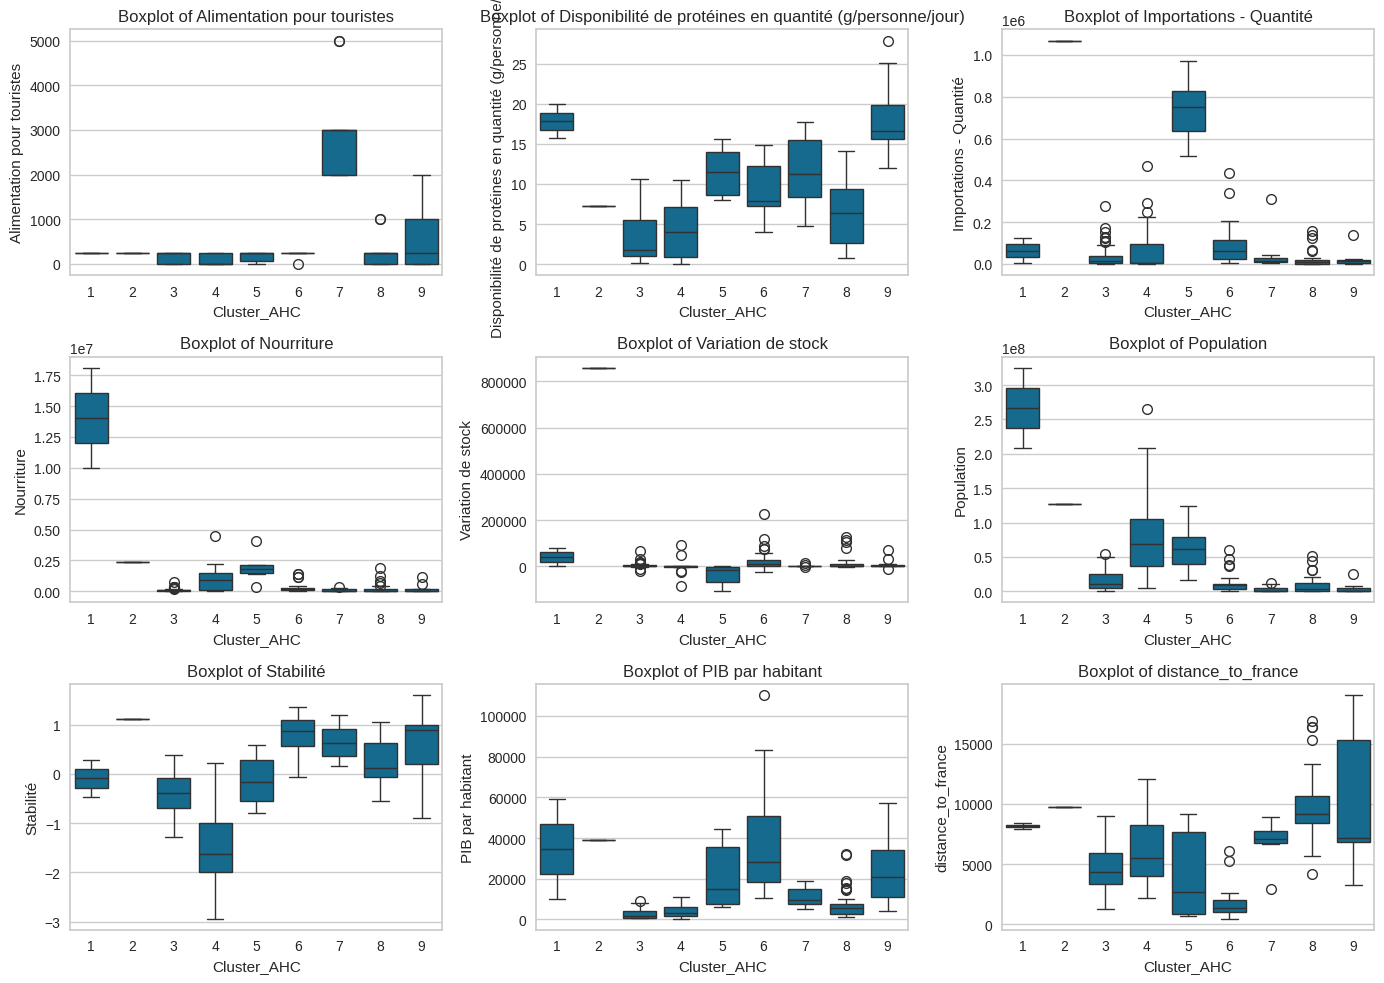

In [ ]:
# Select numeric columns
final_data_numeric = df.select_dtypes(include=['float64', 'int64'])

# Exclude irrelevant columns for boxplots
cols_to_exclude = ['Zone', 'Cluster_AHC']
final_data_numeric = final_data_numeric.drop(columns=cols_to_exclude,
                                             errors='ignore')

# Plot the boxplots for each numeric variable according to the cluster
plt.figure(figsize=(14, 10))

# Cycle through each numeric column and plot a boxplot for each cluster
for i, col in enumerate(final_data_numeric.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Cluster_AHC', y=col, data=df)
    plt.title(f'Boxplot of {col}')
    plt.xlabel('Cluster_AHC')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

We can clearly see that clusters 1 and 9 include the countries which show the greatest quantity of proteins. Cluster 1 also contains the countries with the most food and the most populous populations. Cluster 5 brings together the countries that import the most chicken meat. Cluster 7 contains tourist countries. Cluster 4 is the cluster of the most unstable countries. Cluster 6 is the cluster of the richest countries while cluster 9 brings together the countries furthest from France.

In [ ]:
# Extract numeric columns only
numerical_indicators = df.select_dtypes(include=[np.number]).columns

# Calculate cluster statistics using numeric indicator columns
cah_clusters_statistics = df.groupby('Cluster_AHC')[numerical_indicators].mean()

# Show cluster statistics
styled_stats = (cah_clusters_statistics
 .T
 .style
 .background_gradient(axis='columns')# style.background_gradient allows for a better visualization of the results.
 .format('{:.2f}'))

styled_stats

Cluster_AHC,1,2,3,4,5,6,7,8,9
Alimentation pour touristes,242.78,242.78,132.84,84.44,161.85,233.78,3000.00,199.06,580.93
Disponibilité de protéines en quantité (g/personne/jour),17.80,7.24,3.25,4.32,11.53,9.08,11.60,6.35,18.17
Importations - Quantité,63000.00,1069000.00,34905.66,74565.22,739500.00,93444.44,44800.00,23343.75,21500.00
Nourriture,14041000.00,2359000.00,101528.30,981913.04,1935666.67,309074.07,98300.00,216500.00,188750.00
Variation de stock,40000.00,859000.00,3622.97,-130.43,-37500.00,28296.30,1900.00,16126.08,9000.00
Population,266459289.50,127502725.00,15191862.43,84820419.30,63549246.00,12276196.19,3196323.00,9563450.34,3785932.83
Stabilité,-0.09,1.11,-0.44,-1.52,-0.13,0.81,0.64,0.24,0.62
PIB par habitant,34478.16,38928.95,2690.14,3854.00,21242.68,38678.27,11315.74,7811.29,24674.05
distance_to_france,8158.76,9710.00,4599.28,6101.01,4119.61,1729.66,6980.50,9833.42,9810.13
Cluster_AHC,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00


# **K-Means**

K-means clustering is a popular unsupervised machine learning algorithm used for partitioning a dataset into a pre-defined number of clusters. The goal is to group similar data points together and discover underlying patterns or structures within the data.


In [ ]:
# Function to preprocess the data
def preprocess_data(df):
    # Exclude the 'Zone' column
    X = df.drop(columns=['Zone'])
    # Data normalization
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

In [ ]:
# Function to calculate inertia for different values ​​of K
def calculate_inertia(df, K_range=range(1, 20)):
    # Data preprocessing
    X_scaled = preprocess_data(df)

    # Calculation of inertia for different values ​​of K
    inertia = []
    for k in K_range:
        model = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
        inertia.append(model.inertia_)

    return inertia

# Function to plot inertia
def plot_inertia(K_range, inertia, title):
    plt.figure(figsize=(10, 6))
    plt.plot(K_range, inertia, marker='o')
    plt.title(title)
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

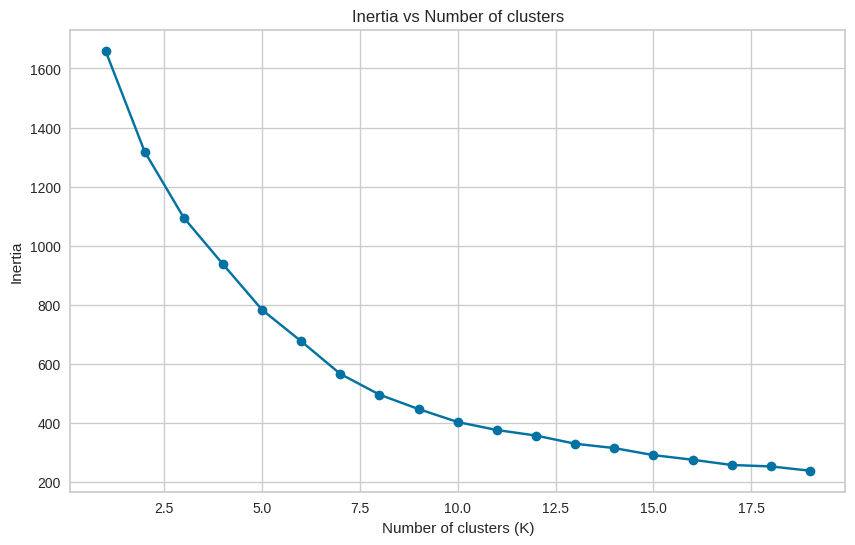

In [ ]:
K_range = range(1, 20)

# Calculate the inertia
inertia = calculate_inertia(df, K_range)
plot_inertia(K_range, inertia, title="Inertia vs Number of clusters")

The optimal number of clusters is not clear where we will use the
KElbowVisualizer method to determine it.

Yellowbrick's KElbowVisualizer implements the “elbow” method of selecting the optimal number of clusters by fitting the K-Means model with a range of values for  K. If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point.

In [ ]:
def preprocess_and_visualize_elbow(df, k_range=(1, 20)):
    # Preprocess data
    X = preprocess_data(df)

    # Instantiate the clustering model and visualizer
    model = KMeans(random_state=42)
    visualizer = KElbowVisualizer(model, k=k_range)

    # Fit the data to the visualizer
    visualizer.fit(X)

    # Finalize and render the figure
    visualizer.show()

    return visualizer

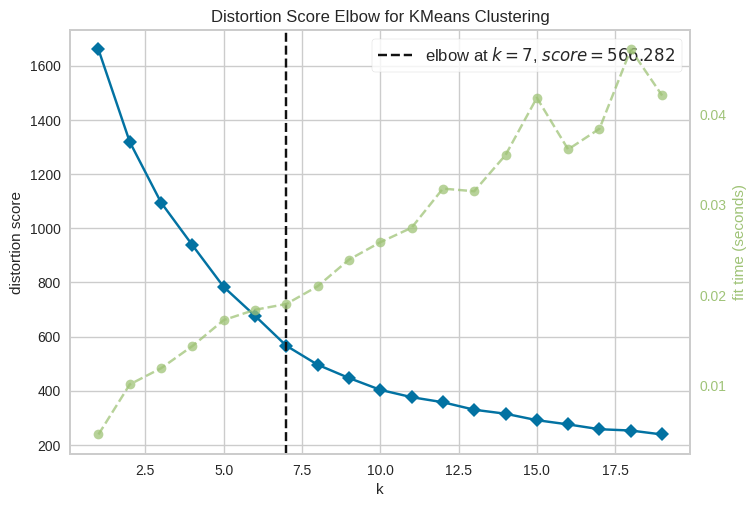

In [ ]:
K_range = range(1, 20)

# Apply the preprocessing and visualization function on the first DataFrame
visualizer = preprocess_and_visualize_elbow(df, K_range)

**Silhouettes Plots/Coefficient**

The silhouette coefficient is a measure of the quality of a partition of a set of data in automatic classification. For each point, its silhouette coefficient is the difference between the average distance with the points of the same group as it (cohesion) and the average distance with the points of the other neighboring groups (separation). If this difference is negative, the point is on average closer to the neighboring group than to its own: it is therefore poorly classified. Conversely, if this difference is positive, the point is on average closer to its group than to the neighboring group: it is therefore well classified.

The silhouette coefficient itself is the average of the silhouette coefficient for all points.

In [ ]:
def silhouette_analysis(df, range_n_clusters):
    # Preprocess data
    X = preprocess_data(df)

    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, random_state=10,
                           init='k-means++', max_iter=1000)
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print(f"For n_clusters = {n_clusters}, \
        The average silhouette_score is: {silhouette_avg}")

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values\
             [cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0,
                              ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        centers = clusterer.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white",
                    alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50,
                        edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(f"Silhouette analysis for KMeans clustering on sample data\
         with n_clusters = {n_clusters}",
                     fontsize=14, fontweight='bold')

    plt.show()

For n_clusters = 2,         The average silhouette_score is: 0.2686919140090264
For n_clusters = 3,         The average silhouette_score is: 0.28520249141818915
For n_clusters = 4,         The average silhouette_score is: 0.31918455511055555
For n_clusters = 5,         The average silhouette_score is: 0.3239035845354346
For n_clusters = 6,         The average silhouette_score is: 0.33766677729752104
For n_clusters = 7,         The average silhouette_score is: 0.3543868673058905
For n_clusters = 8,         The average silhouette_score is: 0.3354910103248219
For n_clusters = 9,         The average silhouette_score is: 0.3338429923547125


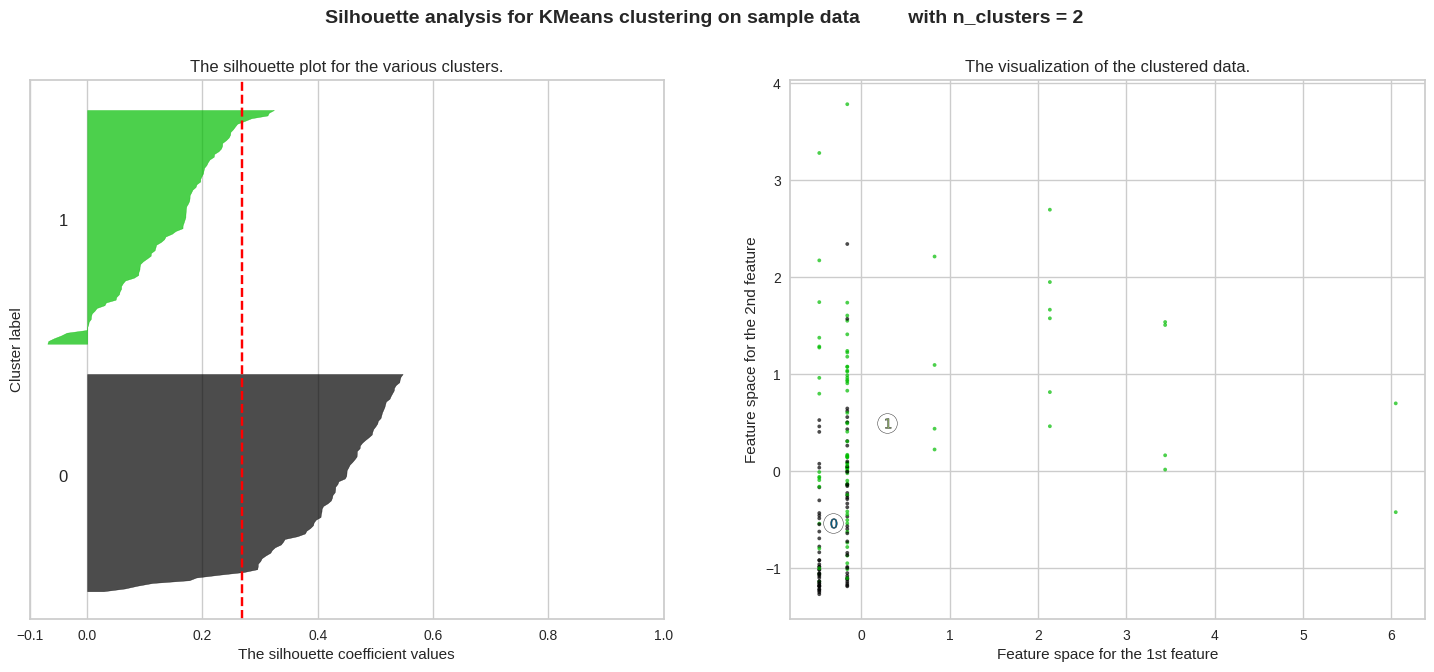

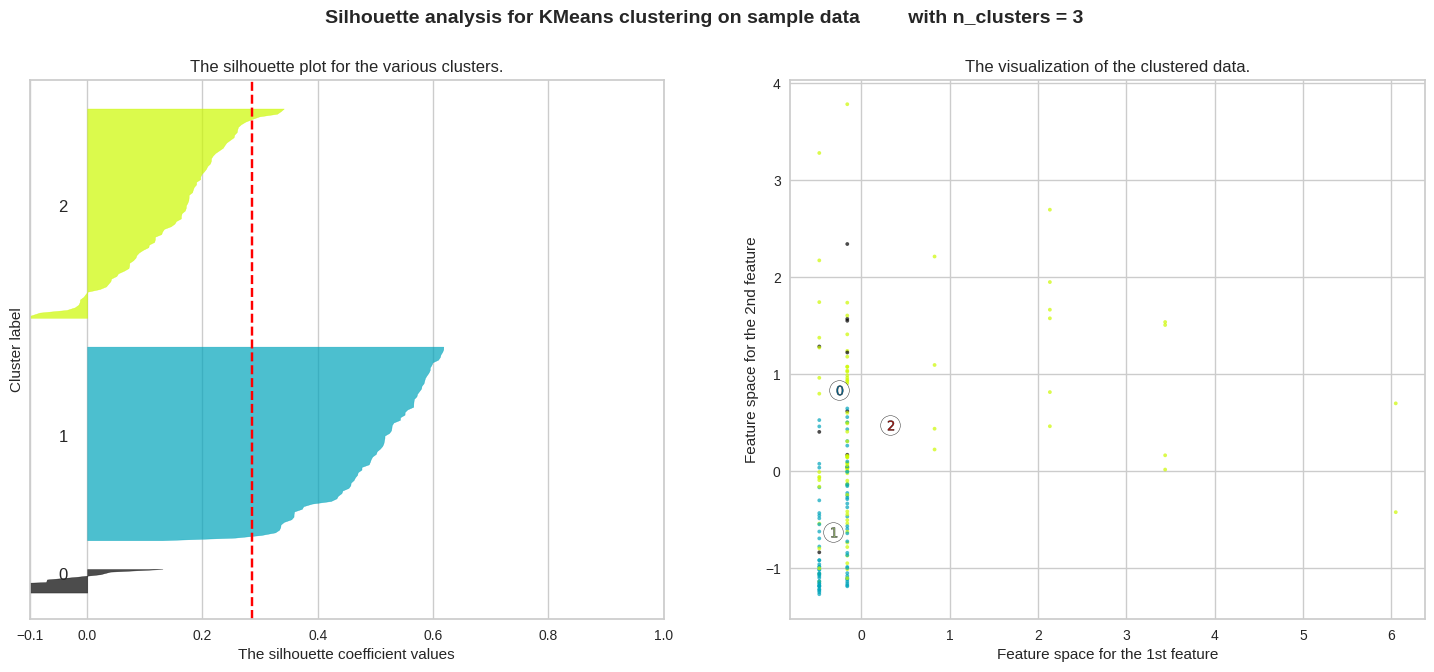

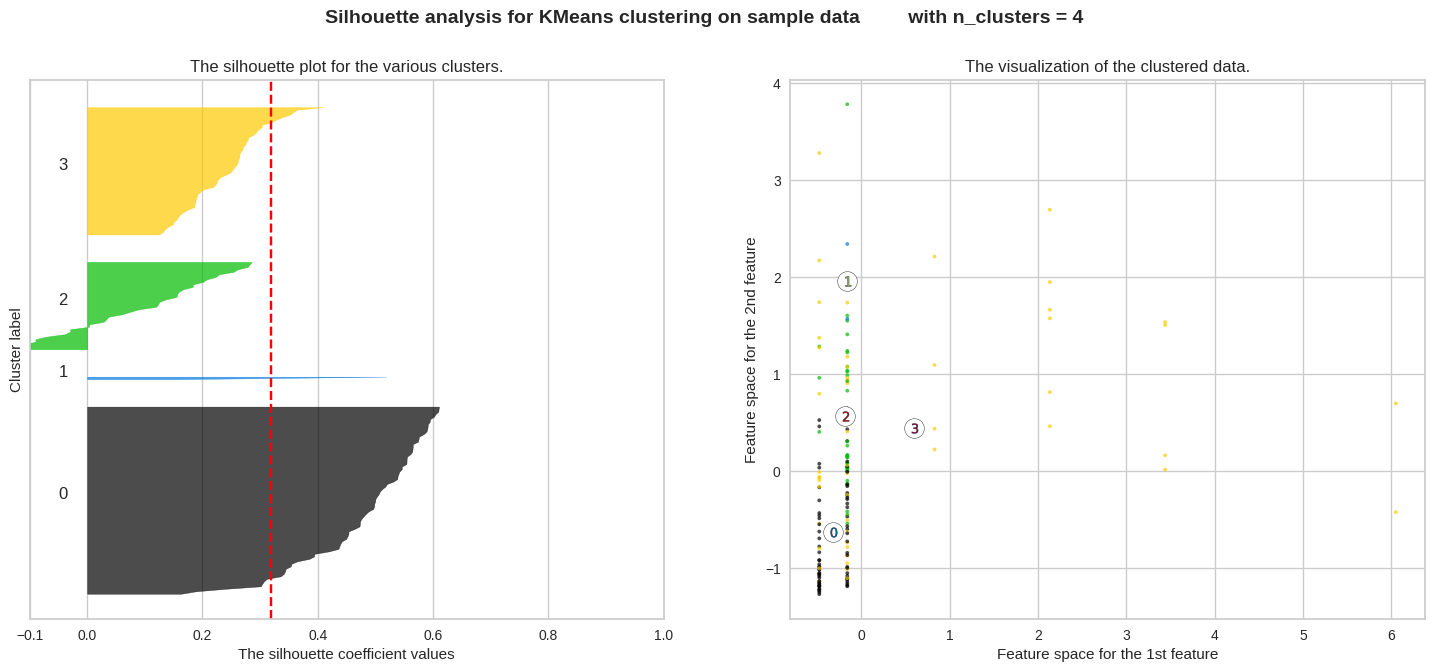

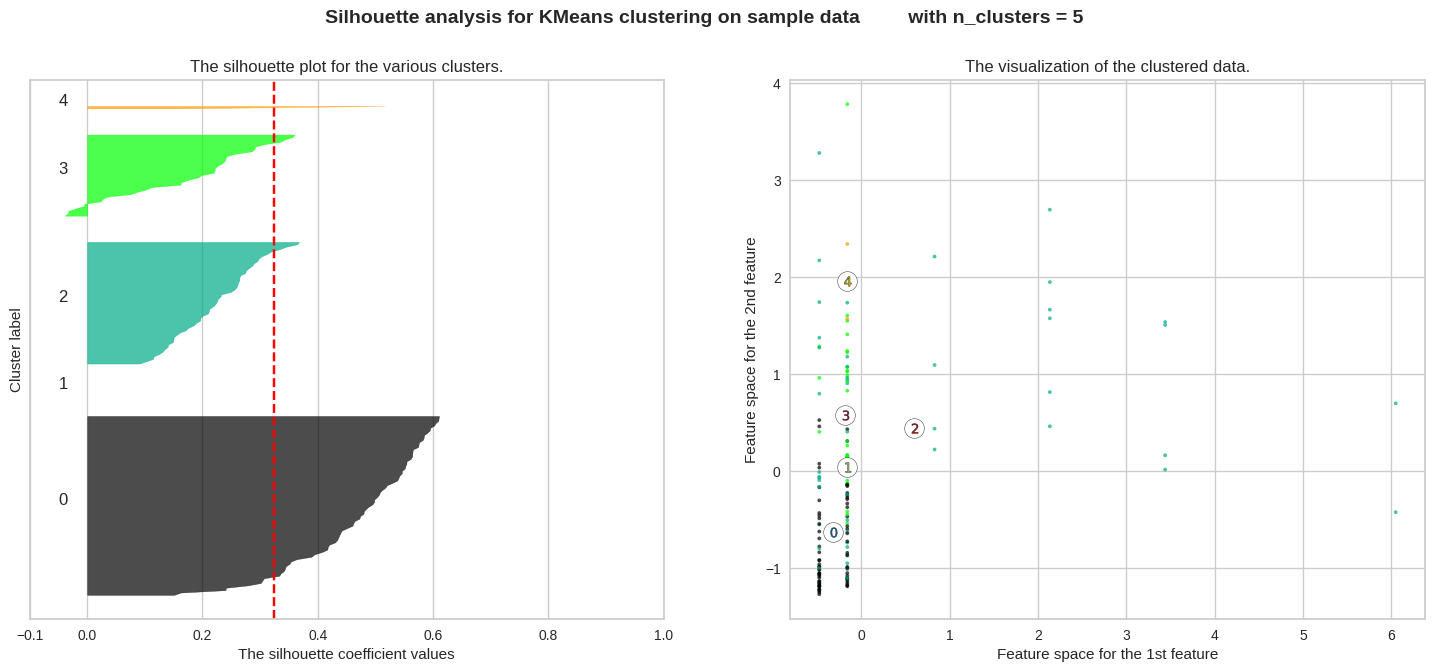

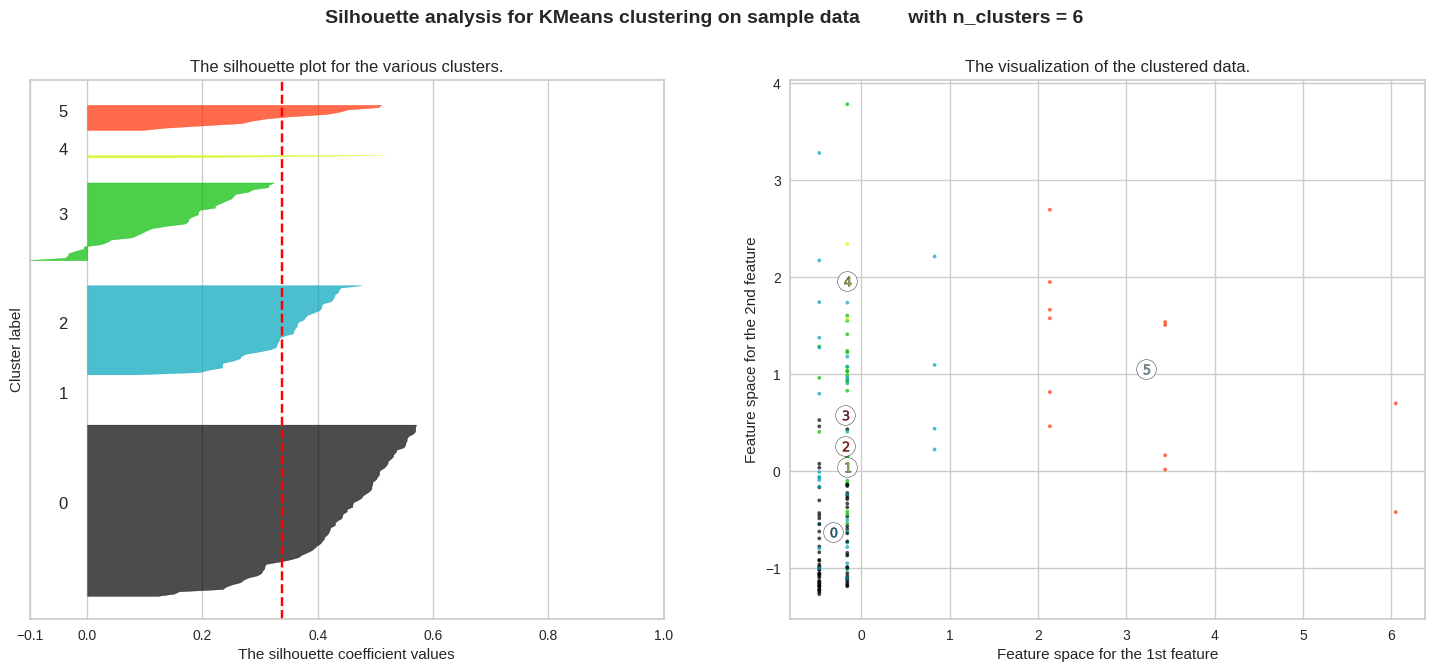

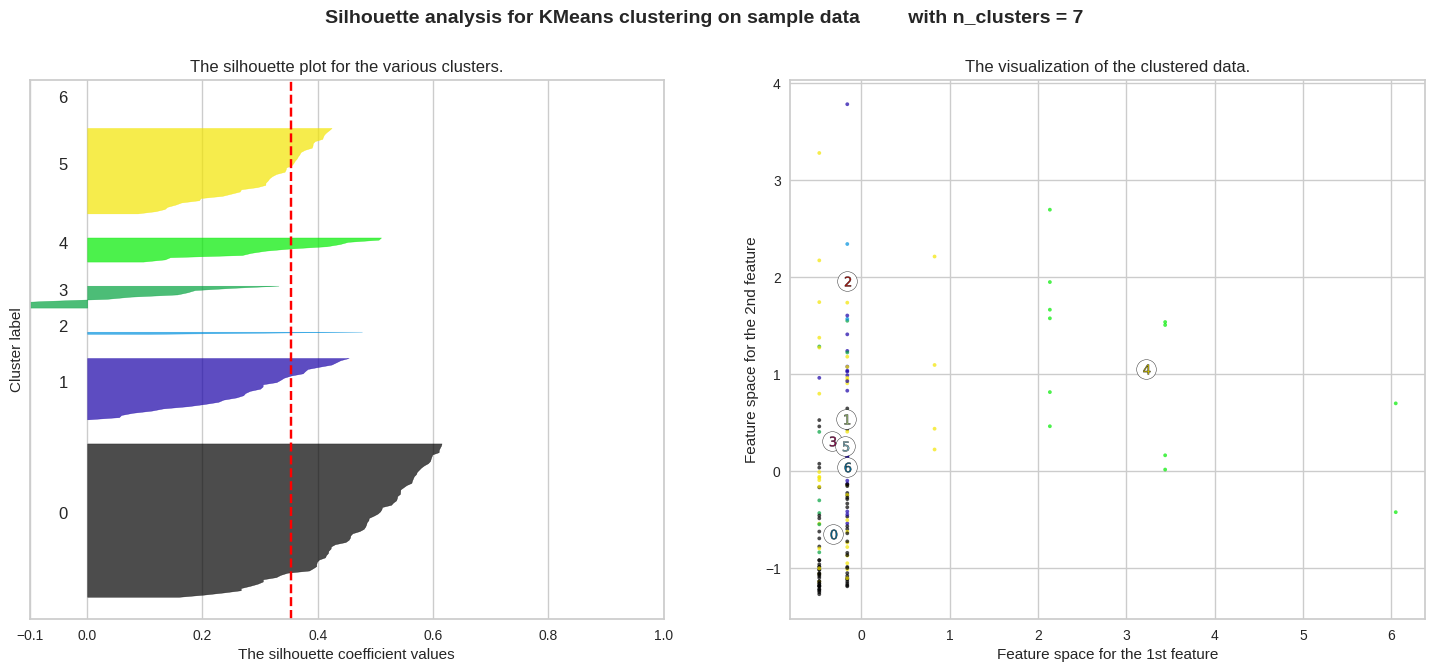

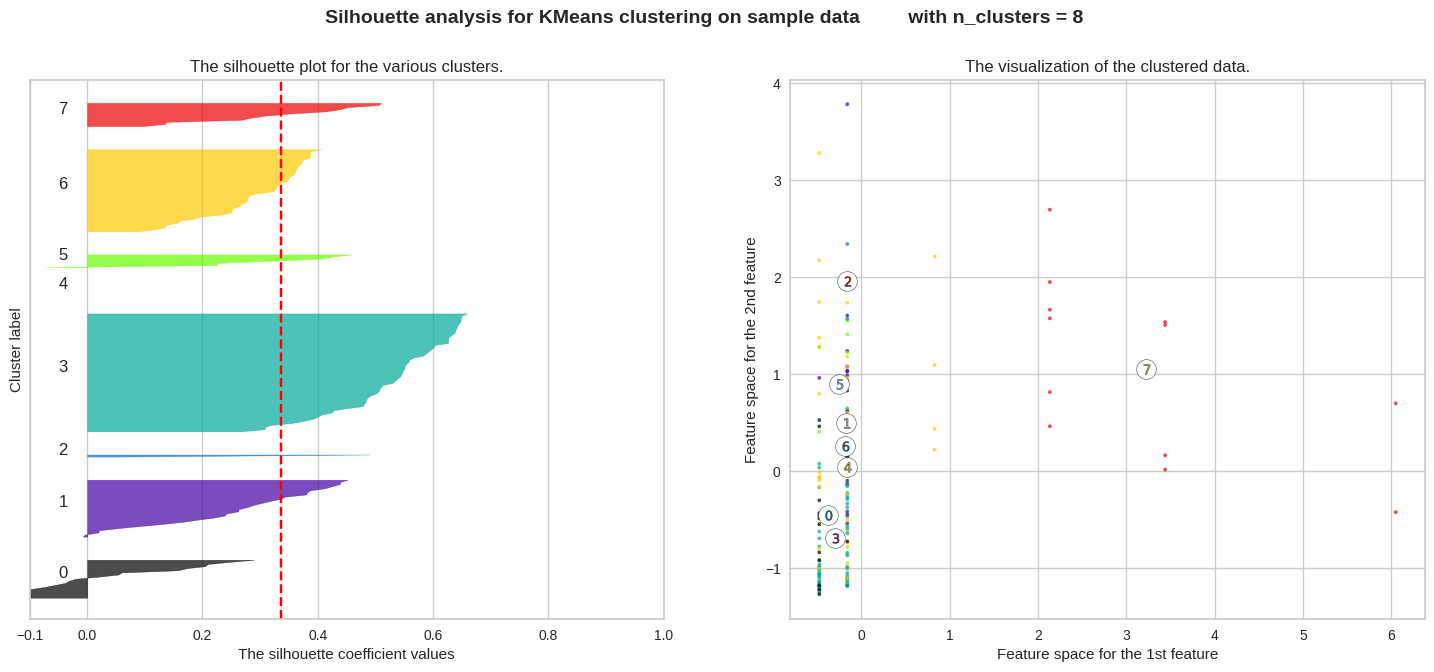

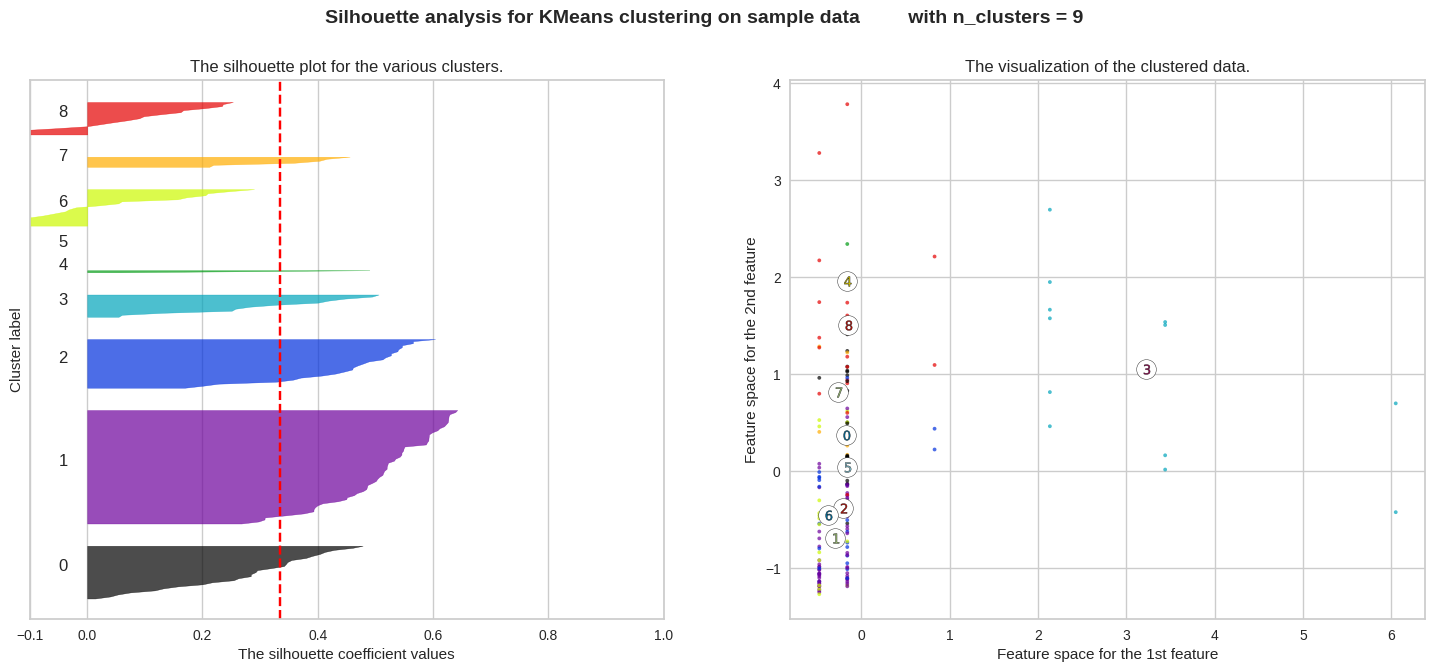

In [ ]:
# Apply the silhouette analysis function on our DataFrame
silhouette_analysis(df, range(2, 10))

For our dataframe, the best silhouette coefficient is obtained for 7 clusters.

In [ ]:
def apply_kmeans_and_visualize(df, df_name, n_clusters):
    # Data preprocessing
    X = preprocess_data(df)

    # Apply KMeans with the specified number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_

    # Show results for the DataFrame
    df[f'Cluster_Kmeans'] = labels
    print(f"Clusters for {df_name} with {n_clusters} clusters:")
    print(df[['Zone', f'Cluster_Kmeans']])

    # Visualization of clusters for the DataFrame
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis',marker='o',
                          edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Clusters for {df_name} with {n_clusters} clusters')
    plt.colorbar(scatter, label='Cluster')
    # for i, txt in enumerate(df['Zone'].values):
    #     plt.annotate(txt, (X[i, 0], X[i, 1]), fontsize=9)
    plt.show()

Clusters for df with 7 clusters:
                         Zone  Cluster_Kmeans
0                 Afghanistan               5
1                South Africa               6
2                     Albania               5
3                     Algeria               5
4                     Germany               6
..                        ...             ...
161      United Arab Emirates               2
162                   Ecuador               1
163  United States of America               3
164                  Ethiopia               5
165           Solomon Islands               1

[166 rows x 2 columns]


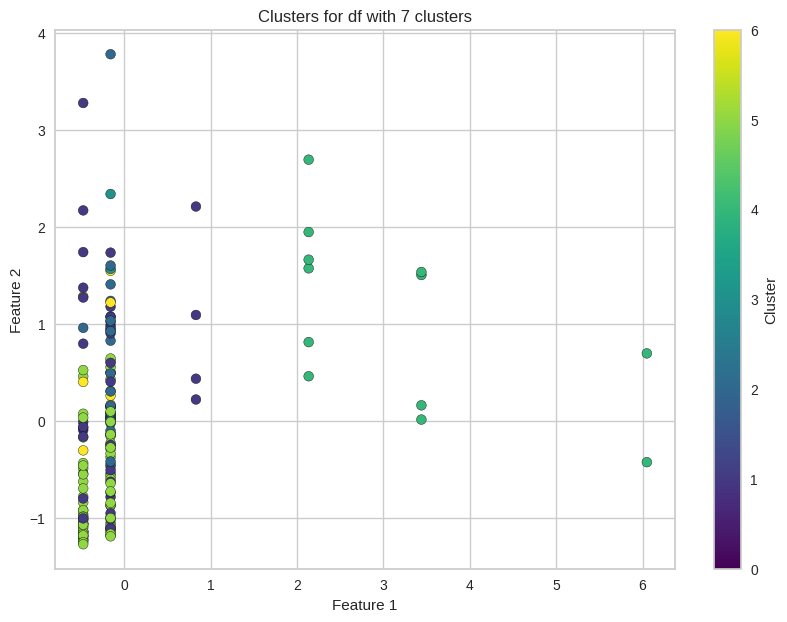

In [ ]:
# Apply KMeans and visualize clusters for the first DataFrame
apply_kmeans_and_visualize(df, "df", 7)

In [ ]:
def analyze_clusters(df, n_clusters):
    # Preprocess data
    X = preprocess_data(df)

    # Choose clustering with KMeans
    myclust = KMeans(n_clusters=n_clusters, random_state=42)
    myclust.fit(X)

    # Obtain cluster labels
    labels = myclust.labels_

    # Number of clusters in labels
    n_clusters_ = len(set(labels))

    print(f'Estimated number of clusters: {n_clusters_}')
    print("Homogeneity: %0.4f" % metrics.homogeneity_score(df.index, labels))
    print("Completeness: %0.4f" % metrics.completeness_score(df.index, labels))
    print("Silhouette Coefficient: %0.4f" % metrics.silhouette_score(X, labels))

    # Add the clusters to the DataFrame
    df['Cluster_Kmeans'] = labels

In [ ]:
# Analyze clusters for df with 5 clusters
print("Analysis for df:")
analyze_clusters(df, n_clusters=7)

Analysis for df:
Estimated number of clusters: 7
Homogeneity: 0.2737
Completeness: 1.0000
Silhouette Coefficient: 0.4082


The objective in the K-means is to reduce the sum of squares of the distances of points from their respective cluster centroids. This value tells how internally coherent the clusters are. ( The less the better)


Homogeneity:

A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.

Completeness:

A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.

**Distances intercluster**

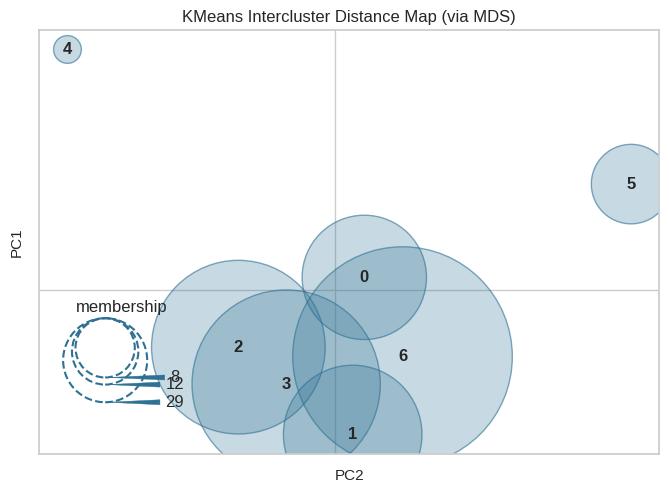

In [ ]:
# Preprocess the data
X = preprocess_data(df)

# Function to visualize intercluster distances
def visualize_intercluster_distance(X, n_clusters, title):
    model = KMeans(n_clusters=n_clusters, random_state=42)
    visualizer = InterclusterDistance(model)
    visualizer.fit(X)
    visualizer.show(title=title)

# Visualize intercluster distances for the first DataFrame
visualize_intercluster_distance(X, n_clusters=7,
                                title="Intercluster Distances for df")

On this projection in 2D, we notice that the various clusters are not very well separated on the first 2 principal components.

**K-Means with reduced data**

**PCA**

In [ ]:
def perform_pca(df, n_components=None):
    # Preprocess data
    X_scaled = preprocess_data(df)

    # Apply PCA
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(X_scaled)

    return pca, principal_components

In [ ]:
def plot_scree_plot(pca, title):
    plt.figure(figsize=(10, 7))
    explained_variance_ratio = pca.explained_variance_ratio_
    n_components = len(explained_variance_ratio)
    indices = np.arange(1, n_components + 1)

    # Colorful scree diagram
    sns.barplot(x=indices, y=explained_variance_ratio, palette='viridis')
    plt.xlabel('Main components')
    plt.ylabel('Relative importance of each eigenvalue')
    plt.title(title)
    plt.xticks(indices)

    # Annotate each bar with the proportion of variance explained
    for i, v in enumerate(explained_variance_ratio):
        plt.text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

    plt.show()

In [ ]:
def plot_scree_plot(pca, title):
 # Calculation of explained and cumulative variances
 explained_variance = pca.explained_variance_
 explained_variance_ratio = pca.explained_variance_ratio_
 cumulative_variance_ratio = explained_variance_ratio.cumsum()

 # Component initialization
 components = np.arange(1, len(explained_variance) + 1)
 component_labels = [f'F{x}' for x in components]

 # Creation of the figure and axes
 fig, ax1 = plt.subplots(figsize=(10, 7))
 ax2 = ax1.twinx()

 # Barplot plot for explained variance
 sns.barplot(x=component_labels, y=explained_variance, ax=ax1,
             palette='viridis')
 ax1.set_xlabel('Main components')
 ax1.set_ylabel('Eigenvalue')

 # Cumulative variance curve plot
 ax2.plot(component_labels, cumulative_variance_ratio, color='C1', marker='.')
 for x, y in enumerate(cumulative_variance_ratio):
  ax2.text(x, (y + 0.05), f'{y:.0%}', ha='center')

 # Set lower limit and secondary axis format
 ax2.set_ylim(bottom=0)
 ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,
                                                    pos: round(x * 100)))
 ax2.set_ylabel('Cumulative variability (%)')

 # Added title
 fig.suptitle(title)

 # Graph display
 plt.show()

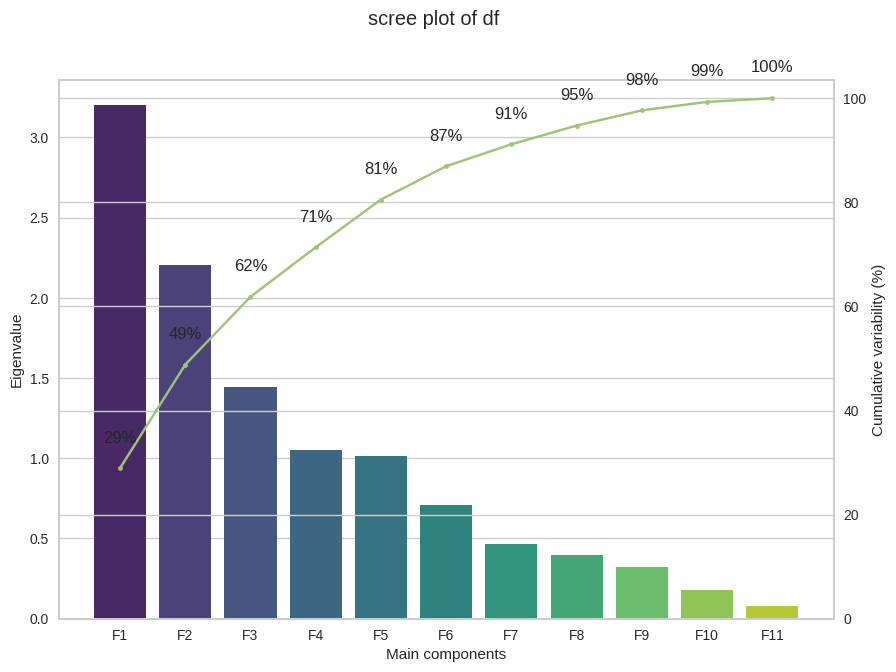

In [ ]:
# PCA and plot of the scree diagram for df
pca, _ = perform_pca(df)
plot_scree_plot(pca, "scree plot of df")

The number of principal components corresponding to the "bend" of the graph, from which to add a new principal component does not make much difference.
In our case, the first 3 components are the main components for the first dataframe and the first component is the main component for the second dataframe. But for convenience we will choose 3 components.

Reducing the dimensionality of data, that is to say the number of variables used to represent it, allows:

Facilitate data visualization;

Reduce the costs of computing, storing and acquiring data;

To improve learning by building less complex models, eliminating irrelevant variables that could skew predictions, and finally reducing the problem of the scourge of dimensionality.

In [ ]:
def find_optimal_components(X):
    pca = PCA()
    pca.fit(X)
    explained_variance = pca.explained_variance_ratio_

    # Plot the cumulative explained variance ratio
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(),
             marker='o', linestyle='--')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
    plt.grid(True)
    plt.show()

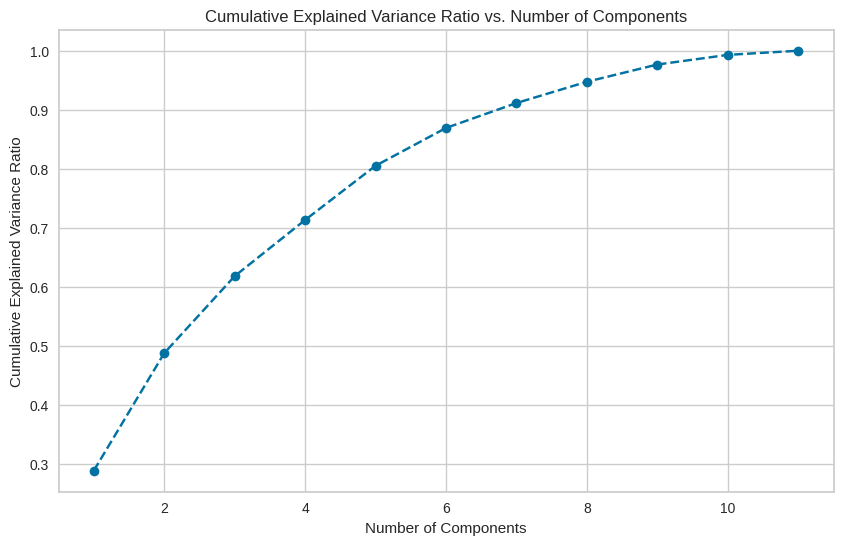

In [ ]:
# Preprocess the first DataFrame
X = preprocess_data(df)

# Apply the function to the first DataFrame
find_optimal_components(X)

In [ ]:
# Apply PCA to the DataFrame
def apply_pca(df, preprocess):
    # Preprocess the data
    X_scaled = preprocess(df)

    # Instantiate the PCA object with n_components explaining 80% of the variance
    pca = PCA(n_components=0.8)

    # Apply PCA to the preprocessed data
    X_pca = pca.fit_transform(X_scaled)

    return pca, X_pca

# Applying PCA
pca, X_pca = apply_pca(df, preprocess_data)

# Print the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.28908515 0.19899725 0.13033677 0.09509909 0.09179849]


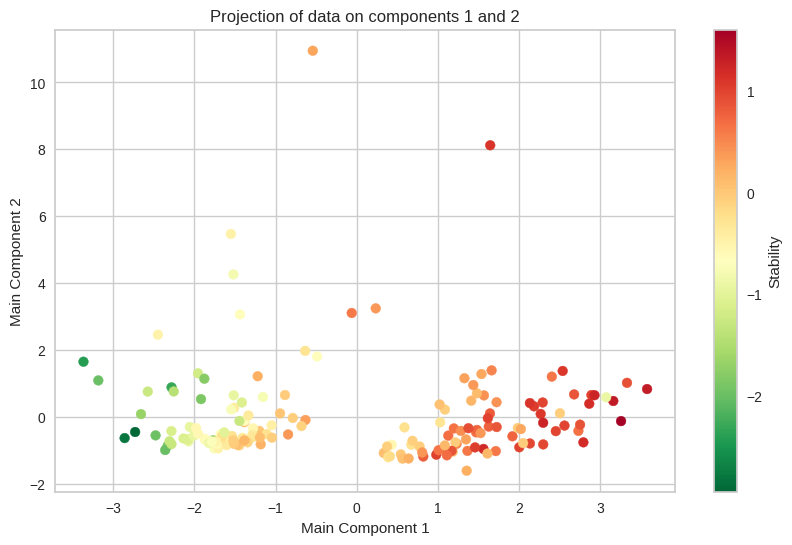

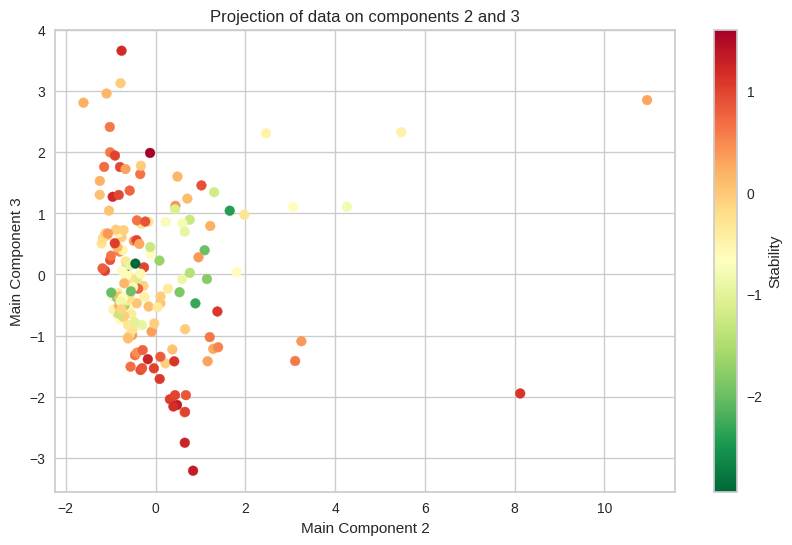

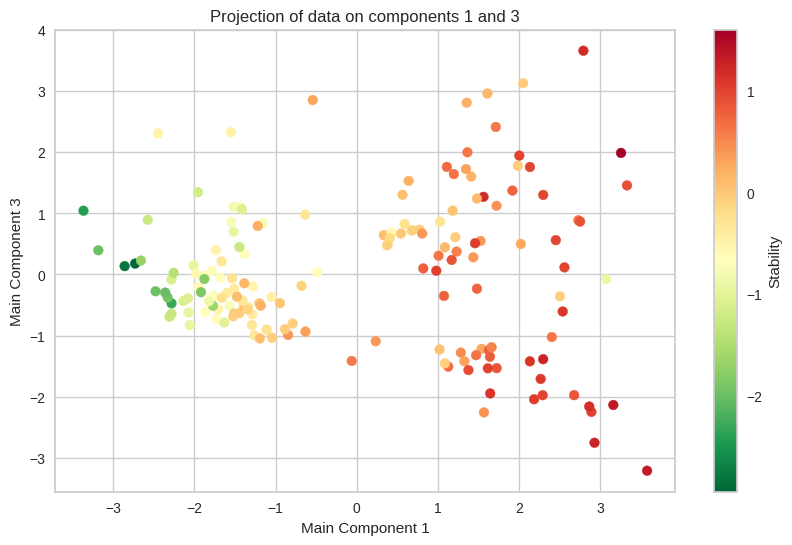

In [ ]:
# Transform the data using the fitted PCA
X_pca_df = pca.transform(preprocess_data(df))

# Plotting the components 1 and 2
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_df[:, 0], X_pca_df[:, 1], c=df['Stabilité'], cmap='RdYlGn_r')
plt.title('Projection of data on components 1 and 2')
plt.xlabel('Main Component 1')
plt.ylabel('Main Component 2')
plt.colorbar(label='Stability')
plt.show()

# Plotting the components 2 and 3
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_df[:, 1], X_pca_df[:, 2], c=df['Stabilité'], cmap='RdYlGn_r')
plt.title('Projection of data on components 2 and 3')
plt.xlabel('Main Component 2')
plt.ylabel('Main Component 3')
plt.colorbar(label='Stability')
plt.show()

# Plotting the components 1 and 3
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_df[:, 0], X_pca_df[:, 2], c=df['Stabilité'], cmap='RdYlGn_r')
plt.title('Projection of data on components 1 and 3')
plt.xlabel('Main Component 1')
plt.ylabel('Main Component 3')
plt.colorbar(label='Stability')
plt.show()


We notice that on the 1st graph, the points are well separated from where components 1 and 2 clearly distinguish the different levels of stability.

Each principal component is a linear combination of the original features. The loadings are the coefficients of this linear combination.

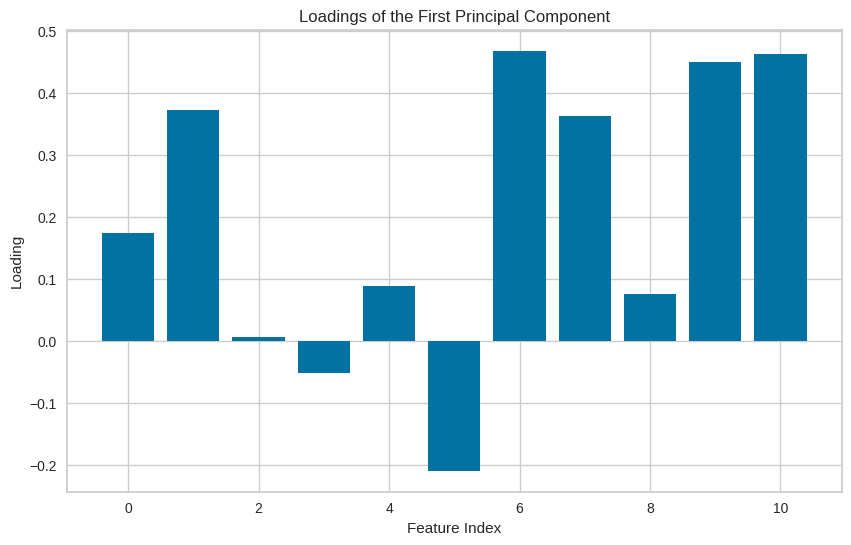

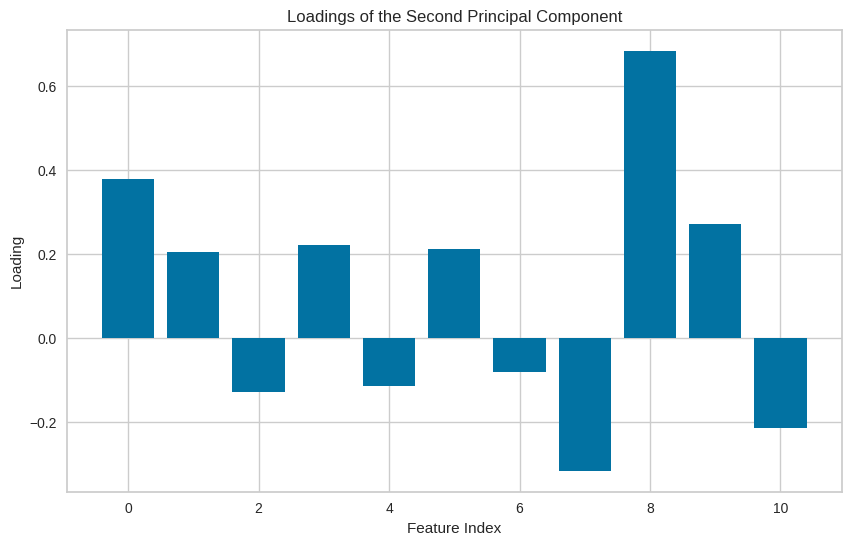

In [ ]:
# Get the loadings of the principal components
loadings = pca.components_

# Plot the loadings for the first component
plt.figure(figsize=(10, 6))
plt.bar(range(len(loadings[0])), loadings[0])
plt.xlabel('Feature Index')
plt.ylabel('Loading')
plt.title('Loadings of the First Principal Component')
plt.show()

# Plot the loadings for the second component
plt.figure(figsize=(10, 6))
plt.bar(range(len(loadings[2])), loadings[2])
plt.xlabel('Feature Index')
plt.ylabel('Loading')
plt.title('Loadings of the Second Principal Component')
plt.show()

Interpreting the loadings of the principal components involves understanding how the original features contribute to each principal component.

We note that variables 6,7 and 9 contribute positively to the first principal component while variables 0 and 8 contribute positively to the second principal component.

Now we will determine the ideal number of clusters(K).

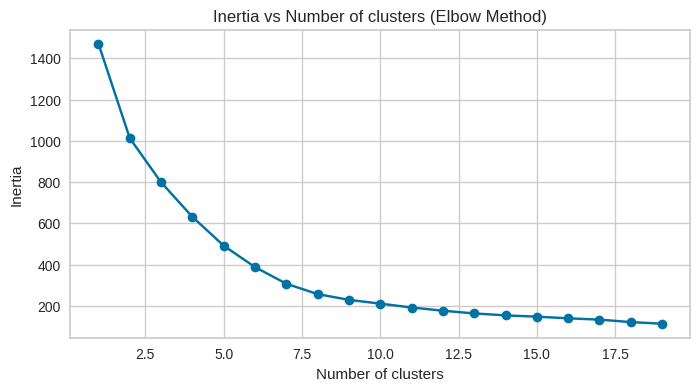

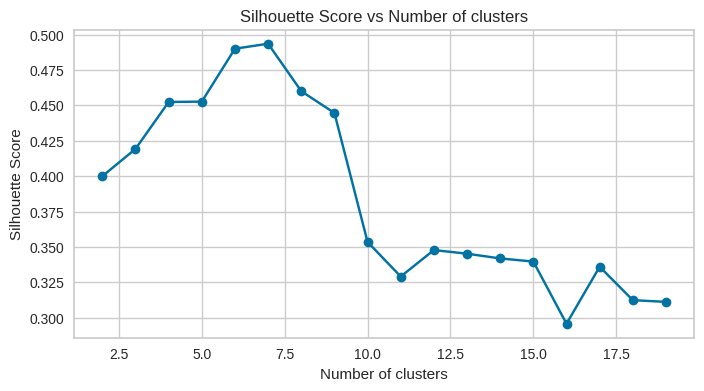

In [ ]:
# Determine the ideal number of clusters using the Elbow Method
def calculate_inertia(data, k_range):
    inertia_values = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia_values.append(kmeans.inertia_)
    return inertia_values

# Determine the ideal number of clusters using the Silhouette Method
def calculate_silhouette_scores(data, k_range):
    silhouette_scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        if k > 1:
            score = silhouette_score(data, kmeans.labels_)
            silhouette_scores.append(score)
        else:
            silhouette_scores.append(float('nan'))  # Silhouette score is not defined for k=1
    return silhouette_scores

# Range of clusters to try
K_range = range(1, 20)

# Calculate the inertia for the Elbow Method
inertia = calculate_inertia(X_pca, K_range)

# Plot the inertia
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Inertia vs Number of clusters (Elbow Method)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Calculate the silhouette scores
K_range_silhouette = range(2, 20)
silhouette_scores = calculate_silhouette_scores(X_pca, K_range_silhouette)

# Plot the silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(K_range_silhouette, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


At the end of this analysis, we can say that the ideal number of clusters is equal to 7.

In [ ]:
# Apply KMeans on data reduced by PCA
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_pca_df)

# Get cluster labels
labels = kmeans.labels_

# Assign clusters to original data
df['Cluster'] = kmeans.labels_

# Add cluster labels to the dataframe
clusters = df['Cluster']

# # Show clusters for each country
# df[['Zone', 'Cluster']]

# Display countries in each cluster
for cluster_num in set(clusters):
    cluster_countries = df[df['Cluster'] == cluster_num]['Zone'].values
    print(f"Cluster {cluster_num}:")
    print(", ".join(cluster_countries))
    print("\n")

Cluster 0:
Austria, Belgium, Canada, Croatia, Denmark, Spain, Estonia, Finland, Greece, Hungary, Ireland, Iceland, Israel, Italy, Kuwait, Latvia, Lithuania, Luxembourg, Malta, Norway, Poland, Portugal, Romania, Slovakia, Slovenia, Switzerland, Sweden, Czechia, United Arab Emirates


Cluster 1:
Antigua and Barbuda, Barbados, Cyprus, Costa Rica, Cuba, Dominica, Grenada, Jamaica, Maldives, French Polynesia, Dominican Republic, Samoa


Cluster 2:
South Africa, Germany, Saudi Arabia, Russia, Mexico, Netherlands, United Kingdom


Cluster 3:
Afghanistan, Albania, Algeria, Angola, Armenia, Azerbaijan, Bangladesh, Bosnia and Herzegovina, Bulgaria, Burkina Faso, Belarus, Benin, Cameroon, Colombia, Democratic Republic of the Congo, Ivory Coast, Djibouti, Gabon, Gambia, Ghana, Guatemala, Guinea, Guinea-Bissau, Georgia, Haiti, Indonesia, Iran, Iraq, Jordan, Kazakhstan, Kenya, Kyrgyzstan, Lebanon, Liberia, North Macedonia, Madagascar, Malawi, Mali, Morocco, Mauritania, Montenegro, Mozambique, Myanma

In [ ]:
# Silhouette coefficient
silhouette_avg = silhouette_score(X_pca_df, labels)
print("Silhouette Score:", silhouette_avg)

# Homogeneity
homogeneity = homogeneity_score(df.index, labels)
print("Homogeneity:", homogeneity)

# Completeness
completeness = completeness_score(df.index, labels)
print("Completeness:", completeness)

Silhouette Score: 0.4935326849160919
Homogeneity: 0.2766295495133961
Completeness: 1.0000000000000002


By comparing the clustering on real data and that carried out on reduced data, we notice that we have gained a little bit in terms of metrics.

**Correlation circles**

The correlation circle is a powerful visual tool for understanding how the original variables combine to form principal components, and for identifying correlation relationships between these variables. It helps interpret the underlying structure of data by visualizing multidimensional relationships in a small space.

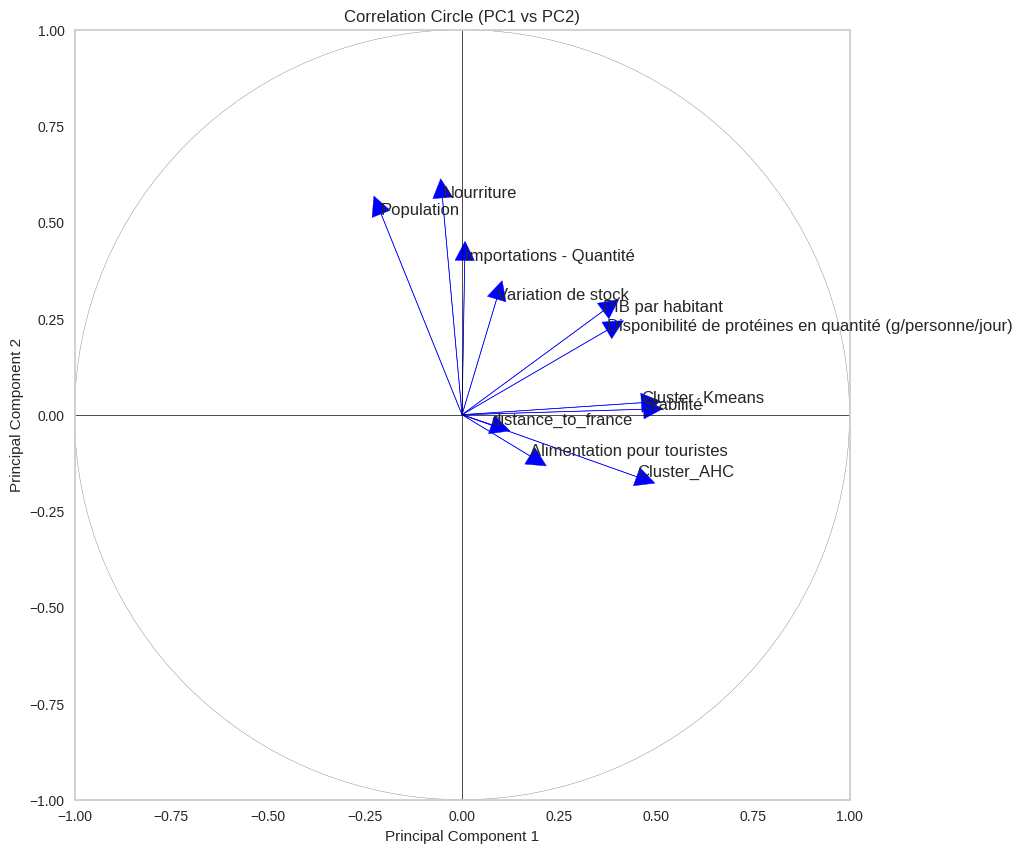

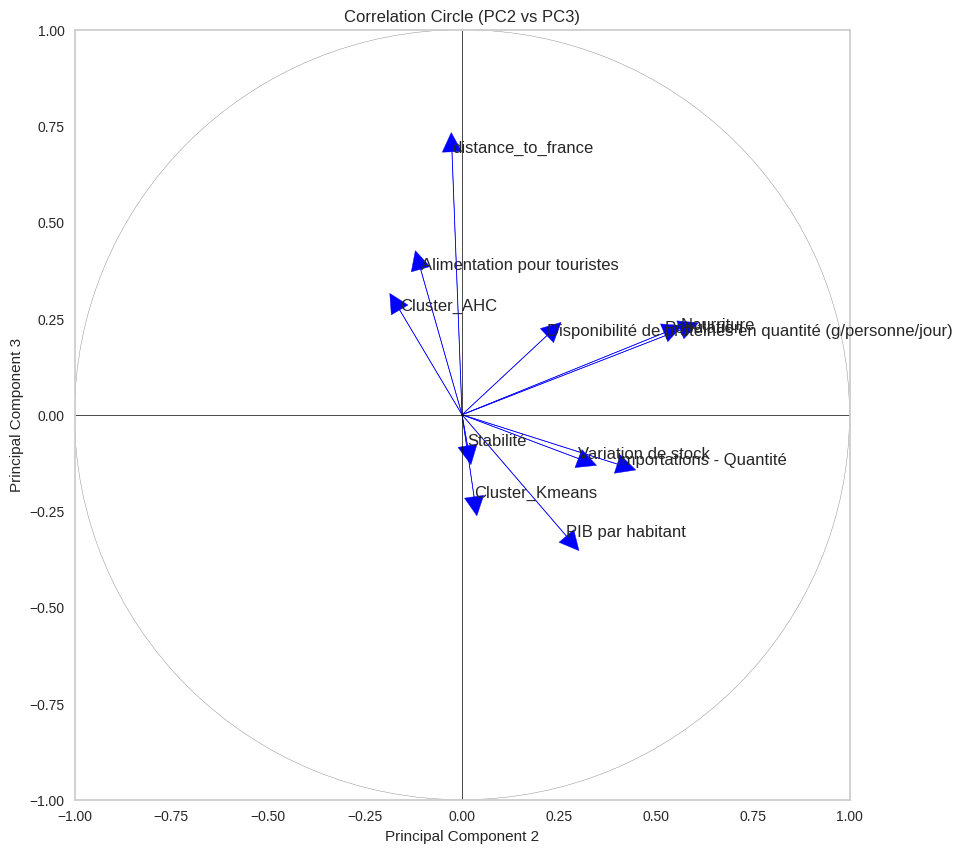

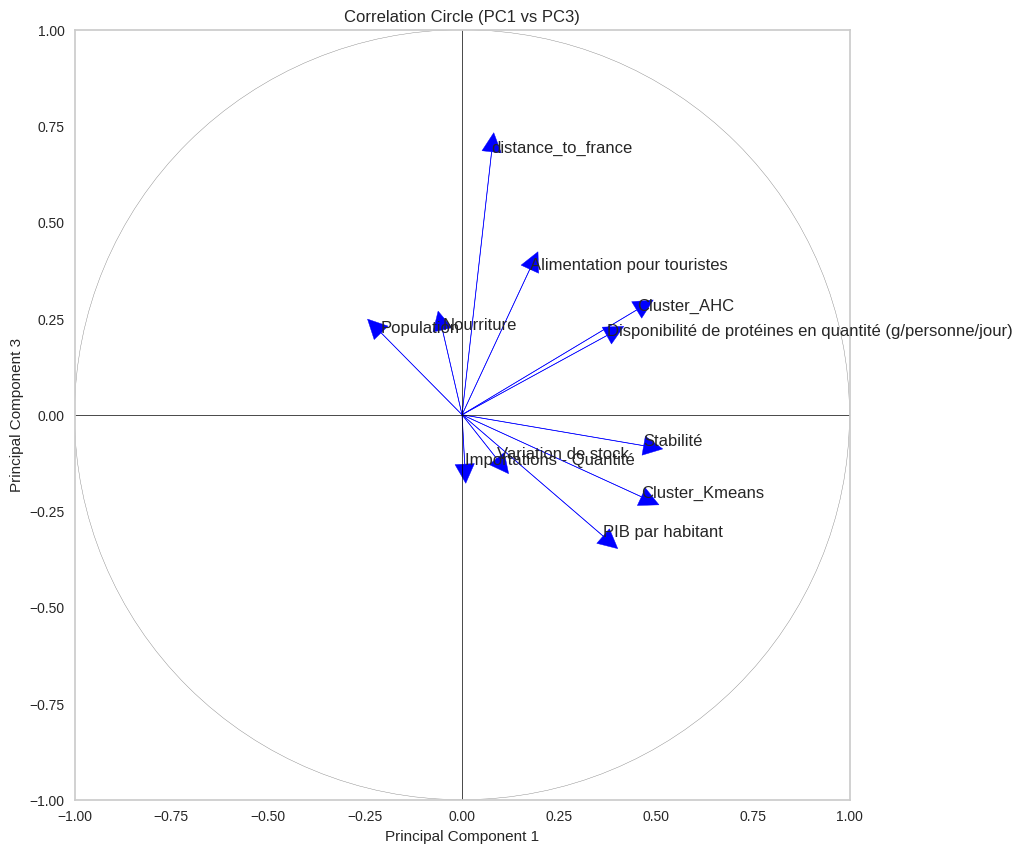

In [ ]:
def plot_correlation_circle(pca, components, labels, comp1, comp2):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)

    # Create the circle
    circle = plt.Circle((0, 0), 1, color='gray', fill=False)
    ax.add_artist(circle)

    # Plot the vectors
    for i, (x, y) in enumerate(zip(components[comp1, :], components[comp2, :])):
        ax.arrow(0, 0, x, y, head_width=0.05, head_length=0.05, fc='blue',
                 ec='blue')
        ax.text(x, y, labels[i], fontsize=12)

    # Add grid, labels, and title
    plt.grid()
    plt.xlabel(f'Principal Component {comp1 + 1}')
    plt.ylabel(f'Principal Component {comp2 + 1}')
    plt.title(f'Correlation Circle (PC{comp1 + 1} vs PC{comp2 + 1})')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.show()

components = pca.components_
labels = df.columns.drop('Zone')

# Plot the correlation circles for the different pairs of components
plot_correlation_circle(pca, components, labels, 0, 1)  # PC1 vs PC2
plot_correlation_circle(pca, components, labels, 1, 2)  # PC2 vs PC3
plot_correlation_circle(pca, components, labels, 0, 2)  # PC1 vs PC3


These 3 correlation circles show that certain variables are well represented by the first three principal components, while others are less well represented . The angles between the vectors also indicate the correlation relationships between the variables.

* The variables most correlated with F1 are :

The 'Stabilité politique' ;

The 'Disponibilité en protéines' ;

The 'PIB par habitant'.

* The variables most correlated with F2 are :

The 'Nourriture' ;

The 'Population'.

* The variables most correlated with à F3 are :

The 'Distance_to_france' ;

The 'Alimentation pour touristes';

The 'Importations_Quantité'.



**Representation of individuals on factorial plans**


Now that we have created new variables, we can project countries onto maps composed of them. We create another function which will allow us to choose the dimensions which will make up the plan that we wish to represent.

In [ ]:
def acp_observations_plot(X_pca, x_d, y_d, labels, pca, text_offset=0.04):
    '''
    Draw the graph of the observations of a PCA.
    Settings :
    - X_pca: data projected into the new space of principal components.
    - x_d: the dimension of the PCA to represent on the x axis.
    - y_d: the dimension of the PCA to represent on the y axis.
    - labels: the list of names of individuals.
    - pca: decomposition carried out.
    - text_offset: the offset for positioning the indicator names.
    '''

    # Initialize variables
    cum_variance_ratio = pca.explained_variance_ratio_[x_d] +\
     pca.explained_variance_ratio_[y_d]

    fig, ax = plt.subplots(figsize=(20, 20))

    # Customize the chart
    ax.set_aspect('equal')
    ax.grid(alpha=0.4)
    ax.set_axisbelow(True)

    for spine in ax.spines.values():
        spine.set_visible(False)

    # Draw the dotted lines for x = 0 and y = 0
    ax.axhline(y=0, linestyle='--', linewidth=0.9, color='k')
    ax.axvline(x=0, linestyle='--', linewidth=0.9, color='k')

    # Shows the location of individuals
    ax.scatter(X_pca[:, x_d], X_pca[:, y_d], marker='.')

    # Add the names of individuals
    for i in range(len(X_pca)):
        ax.text(
            x=(X_pca[i, x_d] + text_offset),
            y=(X_pca[i, y_d] + text_offset),
            s=labels[i], fontsize='x-small'
        )

    # Adds titles (axes and figure)
    ax.set_xlabel(f'F{x_d + 1} ({pca.explained_variance_ratio_[x_d]:.1%})')
    ax.set_ylabel(f'F{y_d + 2} ({pca.explained_variance_ratio_[y_d]:.1%})')
    ax.set_title(f'Observations on F{x_d + 1} and F{y_d + 2}\
     ({cum_variance_ratio:.1%})')

    plt.tight_layout()
    plt.show()

# Extracting country names
labels = df['Zone'].values

We will choose to project our countries on a plan composed of F1 and F3. Indeed :

The higher a country has a value on F1, the more it will have an appetite for chicken meat while being economically developed and reliable;
The lower a country's value on F3, the more it will need to import to satisfy its needs, the closer it is to France.

This should therefore allow us to identify interesting countries for our objective.

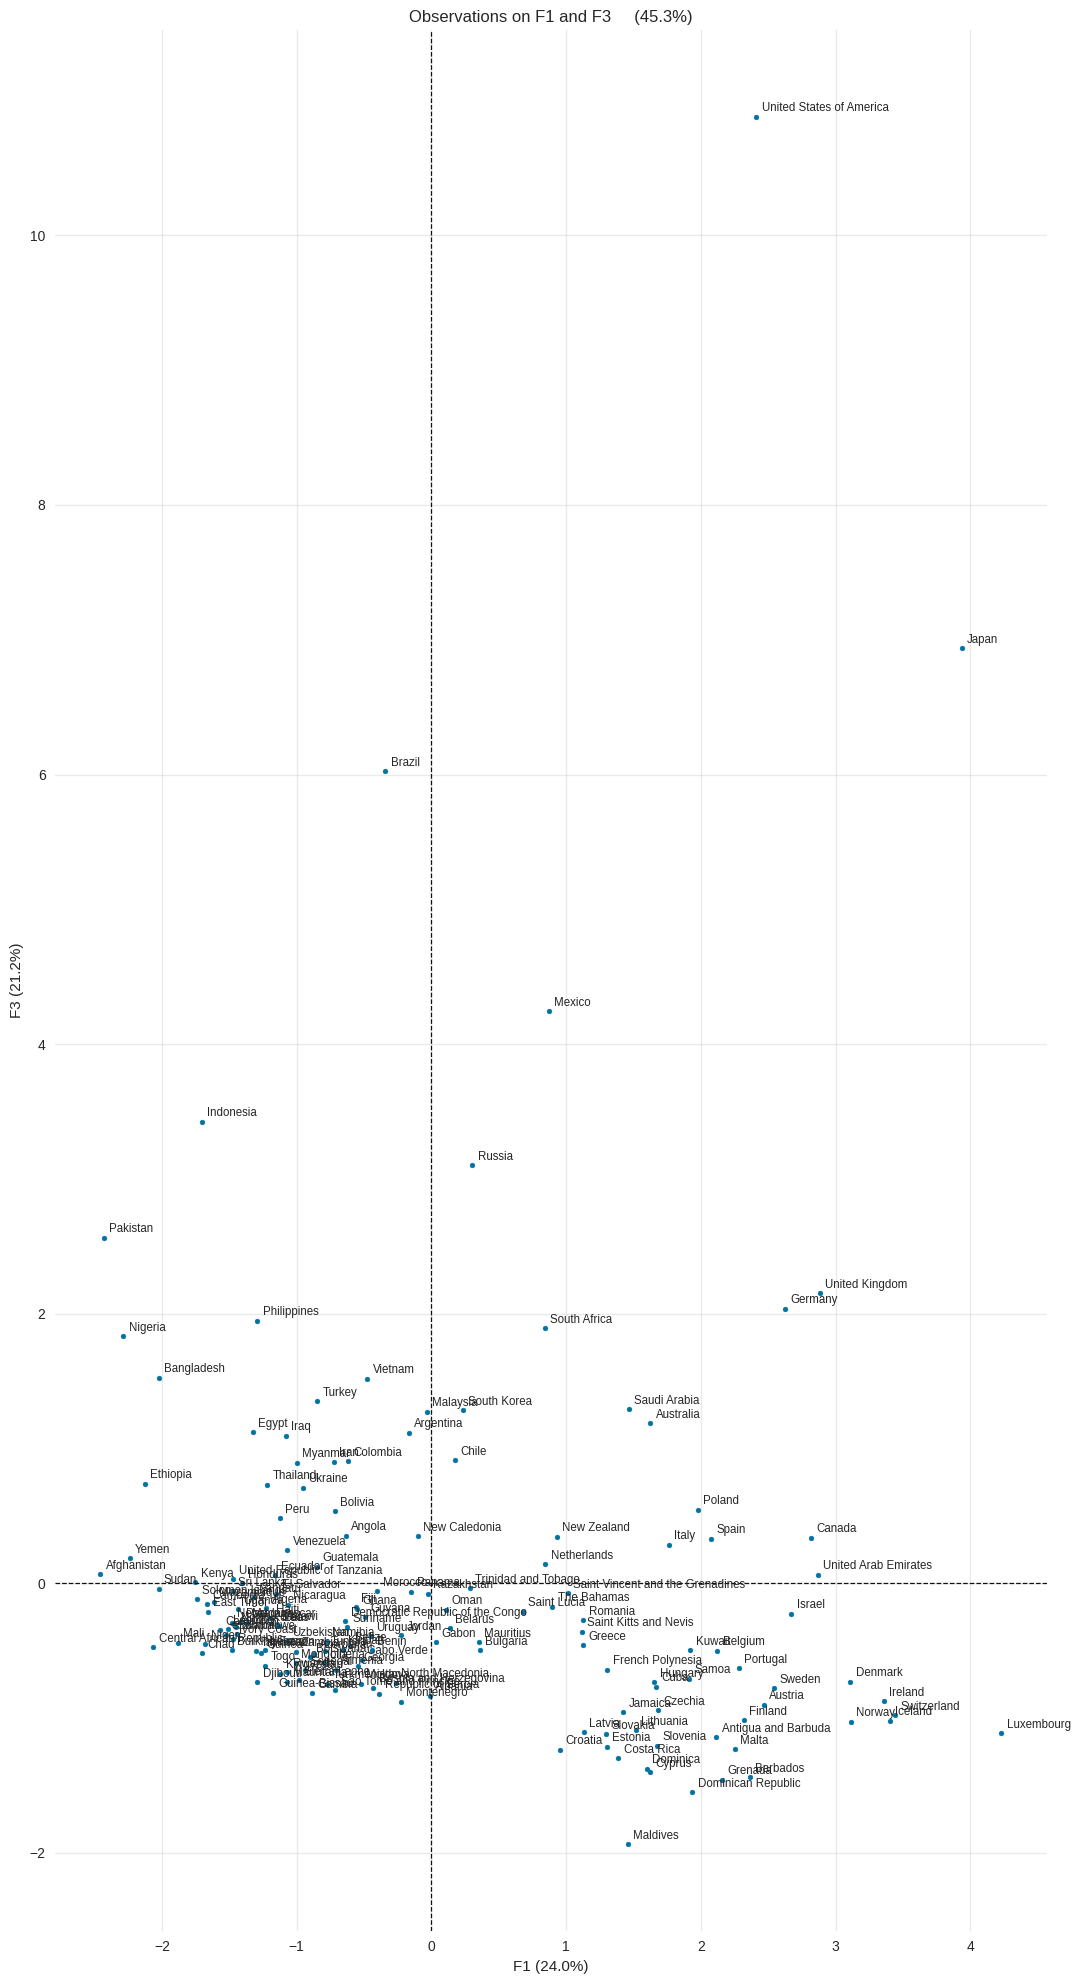

In [ ]:
acp_observations_plot(X_pca, 0, 1, labels, pca)

In the area to the right of the map, and with a fairly low value on F3, we find countries that we could target. To confirm this, we can make the same projection but displaying the clusters created using the CAH and k-means.

In [ ]:
def acp_clusters_plot(X_pca, x_d, y_d, clusters, pca, title):
    '''
    Plot the graph of the observations of a PCA with their cluster.
    Settings :
    - X_pca: data projected into the new space of principal components.
    - x_d: the dimension of the PCA to represent on the x axis.
    - y_d: the dimension of the PCA to represent on the y axis.
    - clusters: the series containing the clusters.
    - pca: decomposition carried out.
    - title: the title of the graph.
    '''

    # Initialize variables
    cum_variance_ratio = pca.explained_variance_ratio_[x_d] +\
     pca.explained_variance_ratio_[y_d]
    df = pd.DataFrame(X_pca, columns=[f'F{i+1}' for i in range(X_pca.shape[1])])
    df['cluster'] = clusters
    n_clusters = len(df['cluster'].unique())
    markers = ['p', '+', '*', 'x', 'o', 's', 'D', '^', 'v', '<', '>']

    fig, ax = plt.subplots(figsize=(8,5))

    # Customize the chart
    ax.set_aspect('equal')
    ax.grid(alpha=0.4)
    ax.set_axisbelow(True)

    for spine in ax.spines.values():
        spine.set_visible(False)

    # Draw the dotted lines for x = 0 and y = 0
    ax.axhline(y=0, linestyle='--', linewidth=0.9, color='k')
    ax.axvline(x=0, linestyle='--', linewidth=0.9, color='k')

    # Shows the location of individuals
    for i in range(n_clusters):
        j = i % len(markers)
        cluster_data = df[df['cluster'] == i]
        ax.scatter(
            cluster_data[f'F{x_d + 1}'],
            cluster_data[f'F{y_d + 1}'],
            marker=markers[j], label=f'Cluster {i + 1}'
        )

    # Adds titles (axes and figure)
    ax.set_xlabel(f'F{x_d + 1} ({pca.explained_variance_ratio_[x_d]:.1%})')
    ax.set_ylabel(f'F{y_d + 1} ({pca.explained_variance_ratio_[y_d]:.1%})')
    ax.set_title(f'{title} on F{x_d + 1} and F{y_d + 1}\
     ({cum_variance_ratio:.1%})')

    fig.tight_layout()

    plt.legend(title='Cluster :')

    plt.show()

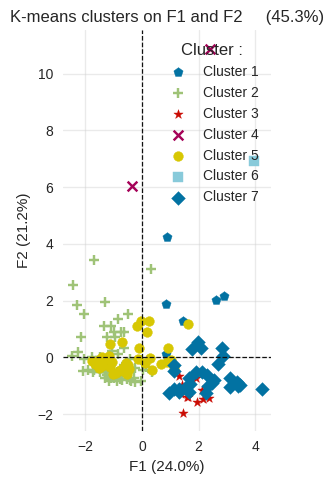

In [ ]:
# Extraction of K-means clusters
clusters_kmeans = df['Cluster_Kmeans'].values

# Selection of columns for PCA
features = df.drop(columns=['Zone', 'Cluster_AHC', 'Cluster_Kmeans'])

# Data normalization
X_scaled = (features - features.mean()) / features.std()

# Apply PCA
pca = PCA().fit(X_scaled)
X_pca = pca.transform(X_scaled)

# Plot observations with K-means clusters
acp_clusters_plot(X_pca, 0, 1, clusters_kmeans, pca, "K-means clusters")

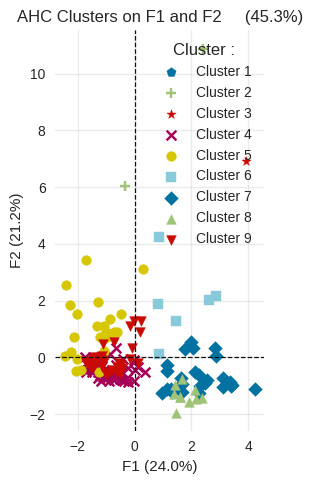

In [ ]:
# Extraction of AHC clusters
clusters_ahc = df['Cluster_AHC'].values

# Plot observations with CAH clusters
acp_clusters_plot(X_pca, 0, 1, clusters_ahc, pca, "AHC Clusters")

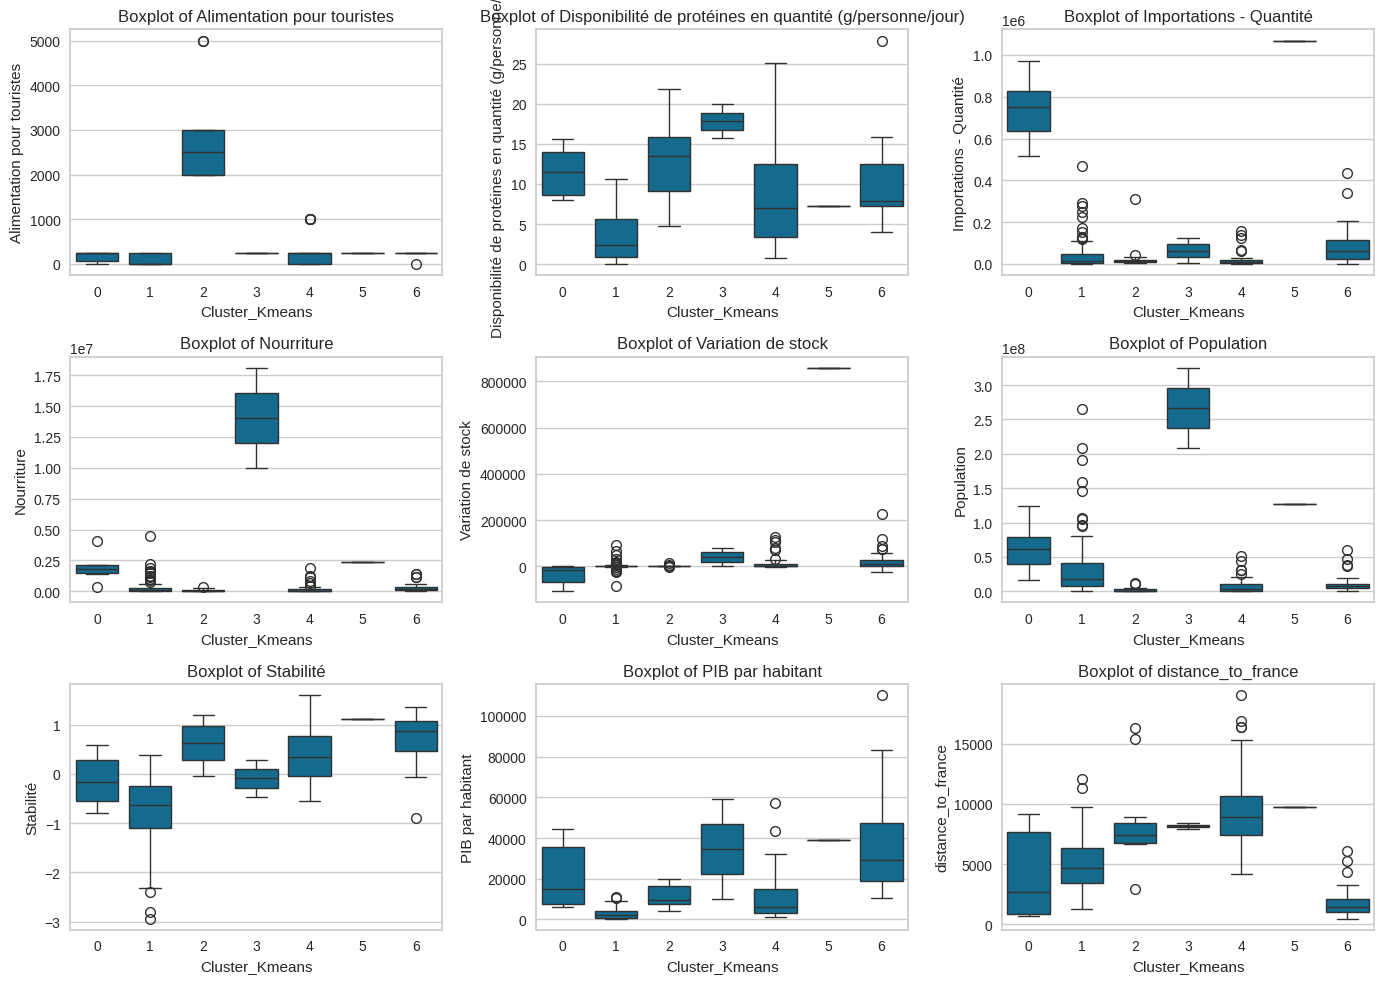

In [ ]:
# Select numeric columns
final_data_numeric = df.select_dtypes(include=['float64', 'int64'])

# Exclude irrelevant columns for boxplots
cols_to_exclude = ['Zone', 'Cluster_AHC', 'Cluster_kmeans']
final_data_numeric = final_data_numeric.drop(columns=cols_to_exclude,
                                             errors='ignore')

# Plot the boxplots for each numeric variable according to the cluster
plt.figure(figsize=(14, 10))

# Cycle through each numeric column and plot a boxplot for each cluster
for i, col in enumerate(final_data_numeric.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Cluster_Kmeans', y=col, data=df)
    plt.title(f'Boxplot of {col}')
    plt.xlabel('Cluster_Kmeans')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

We can clearly see that clusters 1 and 9 include the countries which show the greatest quantity of proteins. Cluster 1 also contains the countries with the most food and the most populous populations. Cluster 5 brings together the countries that import the most chicken meat. Cluster 7 contains tourist countries. Cluster 4 is the cluster of the most unstable countries. Cluster 6 is the cluster of the richest countries while cluster 9 brings together the countries furthest from France.

In [ ]:
# Extract numeric columns only
numerical_indicators = df.select_dtypes(include=[np.number]).columns

# Calculate cluster statistics using numeric indicator columns
Kmeans_clusters_statistics = df.groupby('Cluster_Kmeans')\
 [numerical_indicators].mean()

# Show cluster statistics
styled_stats = (Kmeans_clusters_statistics
 .T
 .style
 .background_gradient(axis='columns')
 .format('{:.2f}'))

styled_stats


Cluster_Kmeans,0,1,2,3,4,5,6
Alimentation pour touristes,161.85,118.19,2833.33,242.78,221.39,242.78,234.41
Disponibilité de protéines en quantité (g/personne/jour),11.53,3.57,12.84,17.80,8.48,7.24,9.96
Importations - Quantité,739500.00,46907.89,40000.00,63000.00,20900.00,1069000.00,91724.14
Nourriture,1935666.67,367960.53,84083.33,14041000.00,210575.00,2359000.00,313413.79
Variation de stock,-37500.00,2487.07,1750.00,40000.00,15800.86,859000.00,26000.00
Population,63549246.00,36263662.54,2702890.33,266459289.50,8467255.10,127502725.00,11853698.07
Stabilité,-0.13,-0.76,0.63,-0.09,0.37,1.11,0.72
PIB par habitant,21242.68,3042.36,11428.99,34478.16,11251.11,38928.95,38494.09
distance_to_france,4119.61,5053.75,8458.35,8158.76,9825.87,9710.00,1874.55
Cluster_AHC,5.00,3.30,7.33,1.00,8.20,2.00,6.21


# **Conclusions**

In [ ]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Function to perform normality tests
def normality_tests(df, numeric_cols):
    results = []
    for col in numeric_cols:
        data = df[col].dropna() # Remove missing values

        # Shapiro-Wilk test
        shapiro_stat, shapiro_p = shapiro(data)

        # Kolmogorov-Smirnov test
        ks_stat, ks_p = kstest(data, 'norm', args=(data.mean(), data.std()))

        results.append({
            'Variable': col,
            'Shapiro-Wilk Statistic': shapiro_stat,
            'Shapiro-Wilk p-value': shapiro_p,
            'KS Statistic': ks_stat,
            'KS p-value': ks_p,
        })

    return pd.DataFrame(results)

# Perform normality tests
normality_results = normality_tests(df, numeric_cols)

# Show the results
normality_results


,Variable,Shapiro-Wilk Statistic,Shapiro-Wilk p-value,KS Statistic,KS p-value
0,Alimentation pour touristes,0.425352,7.099619e-23,0.465996,1.500653e-33
1,Disponibilité de protéines en quantité (g/pers...,0.924021,1.199999e-07,0.103314,5.375470e-02
2,Importations - Quantité,0.490383,1.021371e-21,0.322528,7.239731e-16
3,Nourriture,0.290804,5.562117e-25,0.377565,9.039475e-22
4,Variation de stock,0.287210,4.936552e-25,0.342288,7.240798e-18
5,Population,0.569209,3.761016e-20,0.286691,1.429464e-12
6,Stabilité,0.965967,4.264794e-04,0.069639,3.791618e-01
7,PIB par habitant,0.681653,1.721041e-17,0.245326,2.773177e-09
8,distance_to_france,0.936846,1.047633e-06,0.077161,2.625758e-01
9,Cluster_AHC,0.875669,1.610443e-10,0.198634,3.241426e-06


* Shapiro-Wilk Test:

The Shapiro-Wilk statistic ranges from 0 to 1, where values ​​close to 1 indicate a normal distribution.
The associated p-value is used to test the null hypothesis that the data follows a normal distribution. A p-value less than 0.05 indicates that the null hypothesis can be rejected.

* Kolmogorov-Smirnov Test:

The KS statistic measures the maximum distance between the sample cumulative distribution and the theoretical cumulative distribution (here, a normal distribution). The p-value associated with the KS test indicates whether the null hypothesis (that the data follows a normal distribution) can be rejected. A p-value less than 0.05 indicates that the data does not follow a normal distribution.


The majority of variables do not follow a normal distribution, as indicated by the very low p-values ​​of the Shapiro-Wilk and KS tests. The only possible exceptions are "Stability" and "distance_to_france", where the KS test gives relatively high p-values, suggesting that these data may follow a normal distribution, although the Shapiro-Wilk test indicates otherwise.

Now we will compare protein availability in different political stability groups.

In [ ]:
# Group data by level of political stability
groups = df.groupby('Stabilité')['Disponibilité de protéines en quantité\
 (g/personne/jour)'].apply(list)

# Prepare data for ANOVA test
protein_availability_groups = [group for group in groups]

# Perform the ANOVA test
anova_stat, anova_p = f_oneway(*protein_availability_groups)

print(f"ANOVA statistic: {anova_stat}")
print(f"ANOVA p-value: {anova_p}")

# Results interpretation
if anova_p < 0.05:
    print("There is a significant difference in protein availability between\
     different political stability groups.")
else:
    print("There is no significant difference in protein availability between\
     different political stability groups.")

ANOVA statistic: 2.1550533434367263
ANOVA p-value: 0.002907404046515154
There is a significant difference in protein availability between     different political stability groups.


There is no relationship between protein availability and political stability class.

Top 5 countries to export chicken meat:
                         Zone     Score
81                 Luxembourg  3.270863
163  United States of America  3.126102
138               Switzerland  2.809404
65                    Iceland  2.709626
64                    Ireland  2.663836


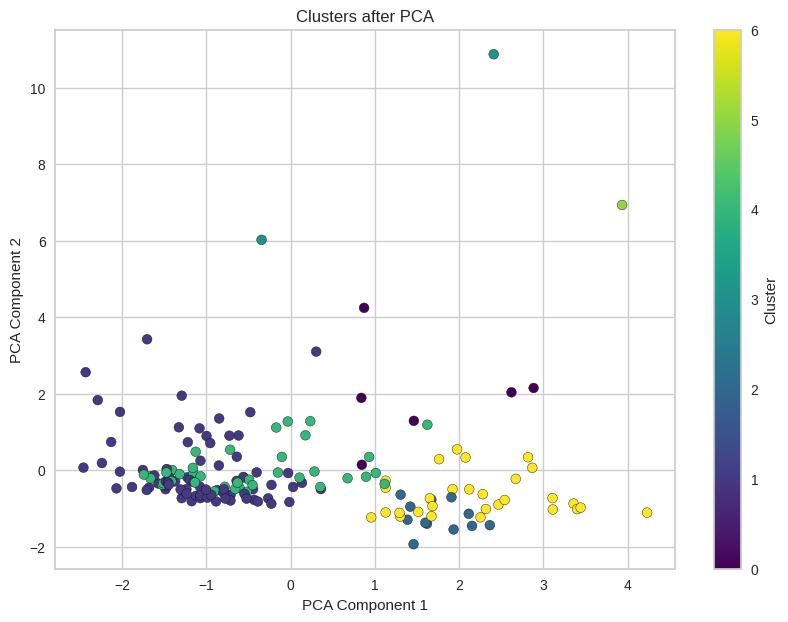

In [ ]:
# Calculate composite score within clusters
df['Stabilité'] = StandardScaler().fit_transform(df[['Stabilité']])

df['Disponibilité de protéines en quantité (g/personne/jour)'] = \
StandardScaler().fit_transform(df[['Disponibilité de protéines en quantité\
 (g/personne/jour)']])

df['PIB par habitant'] = StandardScaler().fit_transform\
 (df[['PIB par habitant']])

df['Population'] = StandardScaler().fit_transform(df[['Population']])

df['distance_to_france'] = StandardScaler().fit_transform\
 (df[['distance_to_france']])

# Score calculation with adjusted weights
df['Score'] = (df['Stabilité'] * 0.25 +
               df['Disponibilité de protéines en quantité (g/personne/jour)'] * 0.2 +
               df['PIB par habitant'] * 0.3 +
               df['Population'] * 0.15 +
               (1 - df['distance_to_france'] * 0.25))


# Select top clusters
# Assuming we want to select the top 2 clusters based on mean scores
cluster_scores = df.groupby('Cluster')['Score'].mean().sort_values\
 (ascending=False)
top_clusters = cluster_scores.head(2).index

# Filter top countries from these clusters
top_countries_df = df[df['Cluster'].isin(top_clusters)].sort_values(by='Score',
                                                      ascending=False).head(5)

print("Top 5 countries to export chicken meat:")
print(top_countries_df[['Zone', 'Score']])

# Visualizing the clusters and top countries
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster_Kmeans'],
                      cmap='viridis',
                      marker='o', edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters after PCA')
plt.colorbar(scatter, label='Cluster')
# for i, txt in enumerate(df['Zone'].values):
#     plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]), fontsize=9)
plt.show()

We can clearly see that the most favorable countries for our business are the neighboring countries of Europe such as Switzerland, Luxembourg and Norway.

we also note that most of the countries on this list belong to cluster 6 except for the United States of America (cluster 1).


In [ ]:
top_countries_df

,Zone,Alimentation pour touristes,Disponibilité de protéines en quantité (g/personne/jour),Importations - Quantité,Nourriture,Variation de stock,Population,Stabilité,PIB par habitant,distance_to_france,Cluster_AHC,Cluster_Kmeans,Cluster,Score,European
81,Luxembourg,242.776667,0.030057,11000.0,11000.0,0.0,-0.553544,1.596717,5.305063,-1.428739,6,6,0,3.270863,European
163,United States of America,242.776667,2.340661,123000.0,18100000.0,80000.0,6.200989,0.425253,2.511710,0.528018,1,3,6,3.126102,Non-European
138,Switzerland,242.776667,-0.096900,51000.0,133000.0,5000.0,-0.389851,1.517868,3.838601,-1.424859,6,6,0,2.809404,European
65,Iceland,0.000000,0.962278,2000.0,10000.0,1000.0,-0.558904,1.619245,3.216388,-0.925112,6,6,0,2.709626,European
64,Ireland,242.776667,0.829881,99000.0,123000.0,-12000.0,-0.466922,1.225002,3.136125,-1.283242,6,6,0,2.663836,European


We note that all these countries are politically stable countries, sparsely populated countries and very close to France (apart from United States of America), and which are countries which show very high GDP per capita.

**Calculation of descriptive statistics for each cluster**

In [ ]:
# Calculate descriptive statistics for each cluster
descriptive_stats_cah = df.groupby('Cluster_AHC').describe()
descriptive_stats_kmeans = df.groupby('Cluster_Kmeans').describe()

print("Descriptive statistics for CAH clusters :")
print(descriptive_stats_cah)

print("\nDescriptive statistics for KMeans clusters :")
print(descriptive_stats_kmeans)


Descriptive statistics for CAH clusters :
            Alimentation pour touristes                            \
                                  count         mean          std   
Cluster_AHC                                                         
1                                   2.0   242.776667     0.000000   
2                                   1.0   242.776667          NaN   
3                                  53.0   132.840063   122.003407   
4                                  23.0    84.444058   118.228535   
5                                   6.0   161.851112   125.369332   
6                                  27.0   233.784939    46.722391   
7                                  10.0  3000.000000  1154.700538   
8                                  32.0   199.061875   240.490696   
9                                  12.0   580.925556   749.913209   

                                                                              \
                     min          25%          50

**Test of independence between clusters and European countries**

In [ ]:
# Added a column indicating whether the country is European or not
european_countries = european_countries = [
    'Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus',
    'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus',
    'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'Georgia', 'Germany',
    'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo',
    'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova',
    'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway',
    'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia',
    'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
    'Ukraine', 'United Kingdom'
]
df['European'] = df['Zone'].apply(lambda x: 'European' if x in\
                                  european_countries else 'Non-European')


In [ ]:
# Contingency table
contingency_table = pd.crosstab(df['Cluster_Kmeans'], df['European'])
print(contingency_table)

European        European  Non-European
Cluster_Kmeans                        
0                      3             3
1                     14            62
2                      1            11
3                      0             2
4                      0            40
5                      0             1
6                     24             5


In [ ]:
# Chi square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi2}, p-value: {p}")

Chi2: 70.88920495993413, p-value: 2.6863835755626573e-13


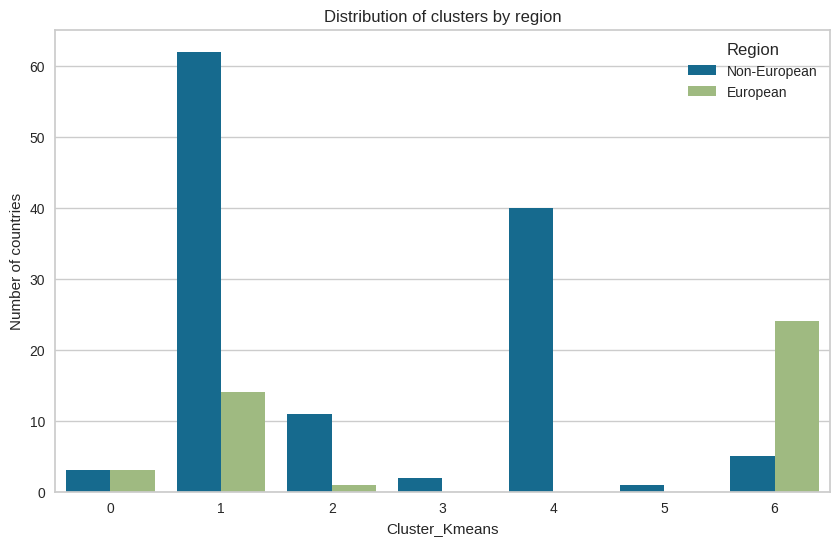

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Cluster_Kmeans', hue='European')
plt.title('Distribution of clusters by region')
plt.xlabel('Cluster_Kmeans')
plt.ylabel('Number of countries')
plt.legend(title='Region')
plt.show()

With such a low p-value, we can reject the null hypothesis. This means that there is a significant association between Cluster_Kmeans and whether the countries are European or not.

The results indicate that the distributions of clusters from kmeans (Cluster_Kmeans) differ significantly between European and non-European countries. In other words, European and non-European countries tend to belong to different clusters.


These differences exist perhaps due to economic, geographical, cultural, etc. factors.